In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
glass= pd.read_csv('https://gist.githubusercontent.com/timudata/fbc3fc9443121d1fb55b299da2e88490/raw/23aad569a2c1d91ddcd536981150a8dd0971707b/glass.csv')
glass

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
glass.shape

(214, 11)

In [4]:
glass.head()

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass.isnull()

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False


In [6]:
glass.isnull().sum()

Unnamed: 0    0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Type          0
dtype: int64

In [7]:
glass.isna().sum()

Unnamed: 0    0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Type          0
dtype: int64

<AxesSubplot:>

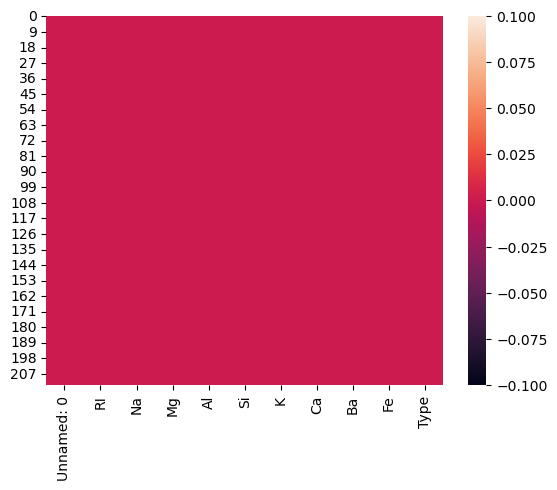

In [8]:
sns.heatmap(glass.isnull())

In [9]:
glass.columns

Index(['Unnamed: 0', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type'],
      dtype='object')

In [10]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  Type        214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [11]:
# Data types

glass.dtypes

Unnamed: 0      int64
RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
Type            int64
dtype: object

In [12]:
glass.drop(['Unnamed: 0'], axis=1, inplace=True)

In [13]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [14]:
glass.shape

(214, 10)

In [15]:
# Unique values

glass['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [16]:
glass['Type'].nunique()

6

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


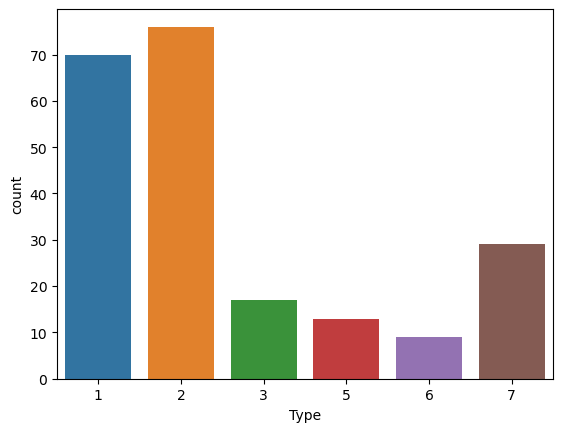

In [17]:
# Countplot

sns.countplot(glass['Type'])
print(glass['Type'].value_counts())

In [18]:
# Converting the the of glass columns in value of 1 & 0

glass['Type'].replace([1,2,3,4,5,6,7], [0,0,0,0,1,1,1], inplace= True)

In [19]:
glass['Type'].unique()

array([0, 1], dtype=int64)

0    163
1     51
Name: Type, dtype: int64 

0    76.168224
1    23.831776
Name: Type, dtype: float64


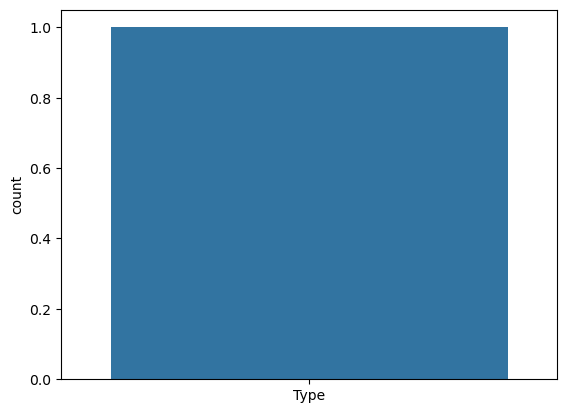

In [20]:
sns.countplot(['Type'])
print(glass['Type'].value_counts(), '\n')
print(glass['Type'].value_counts(normalize= True)*100)

In [21]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.238318
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,0.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


In [22]:
# Visualization of the data

glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

<AxesSubplot:xlabel='RI', ylabel='Count'>

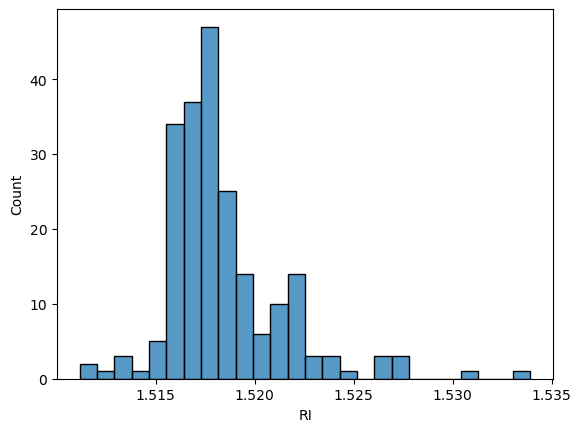

In [23]:
sns.histplot(glass['RI'])

<AxesSubplot:xlabel='Na', ylabel='Count'>

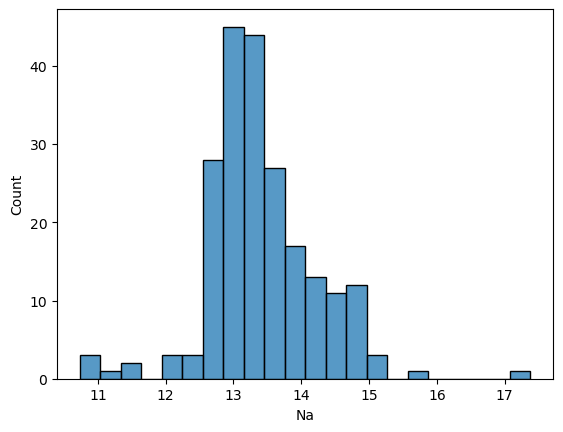

In [24]:
sns.histplot(glass['Na'])

<AxesSubplot:xlabel='Mg', ylabel='Count'>

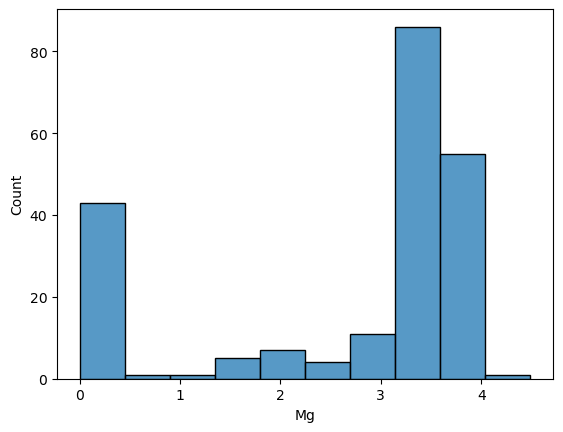

In [25]:
sns.histplot(glass['Mg'])

<AxesSubplot:xlabel='Al', ylabel='Count'>

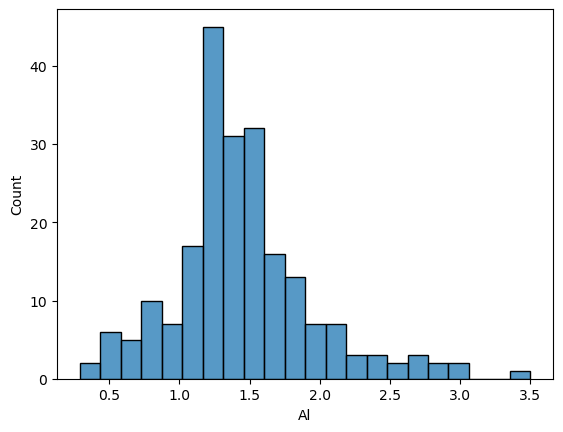

In [26]:
sns.histplot(glass['Al'])

<AxesSubplot:xlabel='Si', ylabel='Count'>

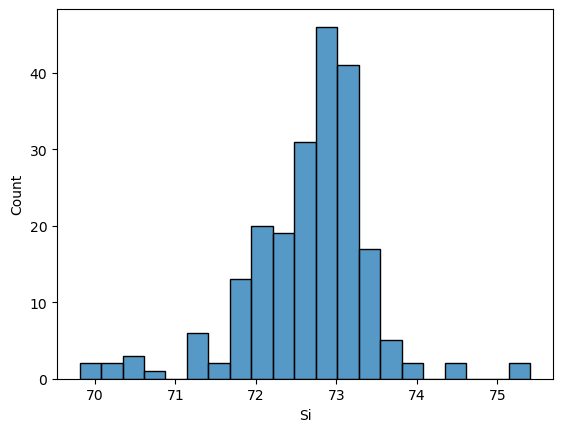

In [27]:
sns.histplot(glass['Si'])

<AxesSubplot:xlabel='K', ylabel='Count'>

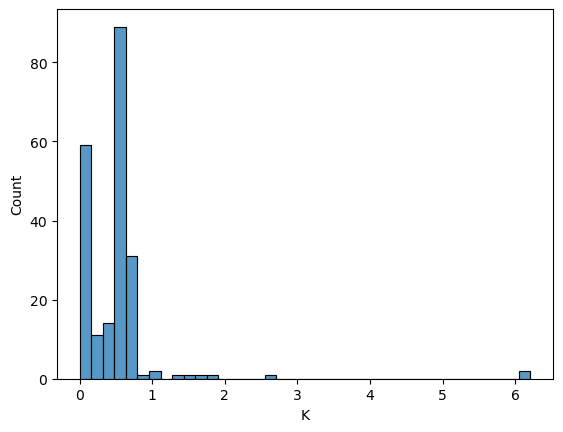

In [28]:
sns.histplot(glass['K'])

<AxesSubplot:xlabel='Ca', ylabel='Count'>

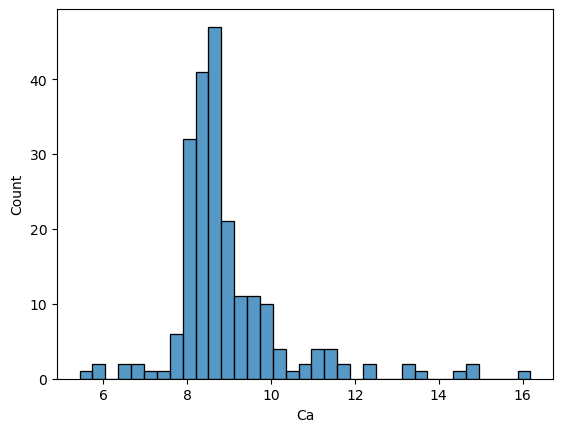

In [29]:
sns.histplot(glass['Ca'])

<AxesSubplot:xlabel='Ba', ylabel='Count'>

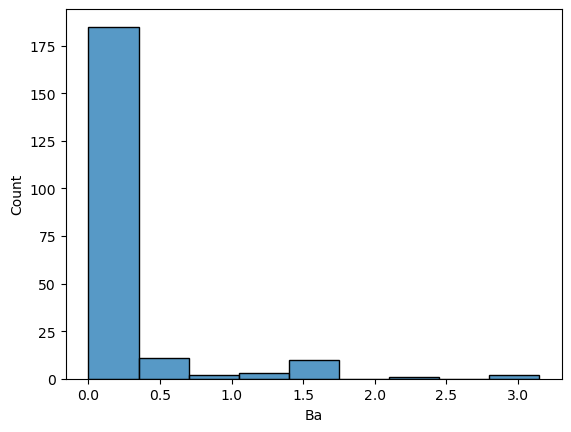

In [30]:
sns.histplot(glass['Ba'])

<AxesSubplot:xlabel='Fe', ylabel='Count'>

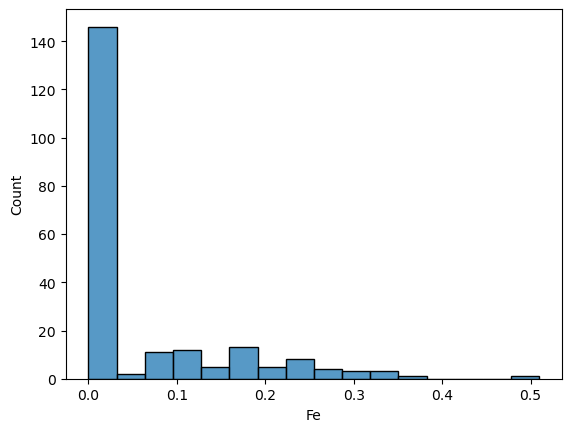

In [31]:
sns.histplot(glass['Fe'])

<AxesSubplot:xlabel='Type', ylabel='count'>

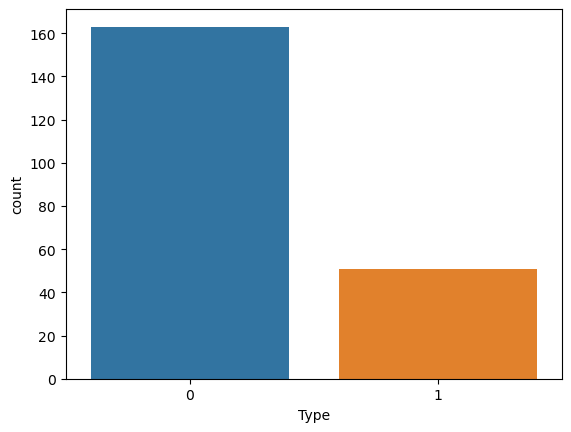

In [32]:
sns.countplot(glass['Type'])

RI


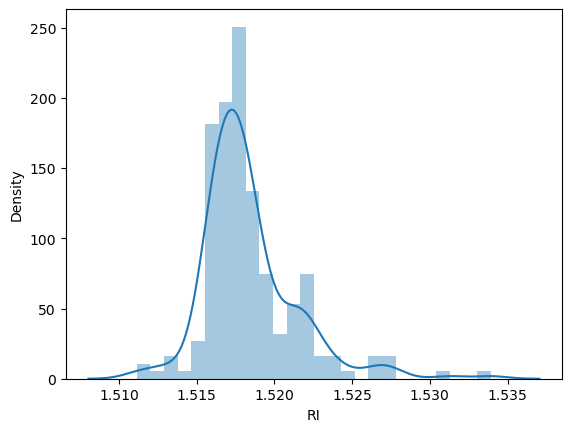

Na


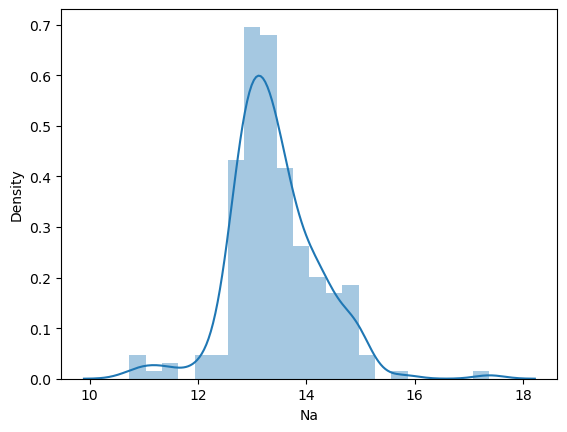

Mg


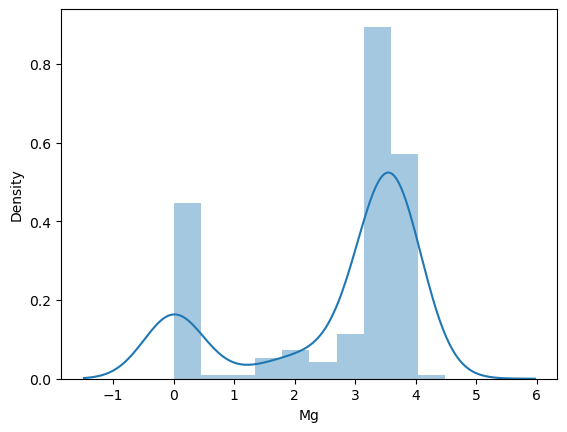

Al


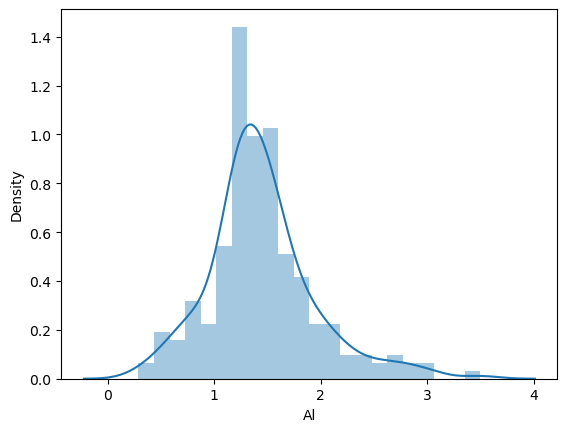

Si


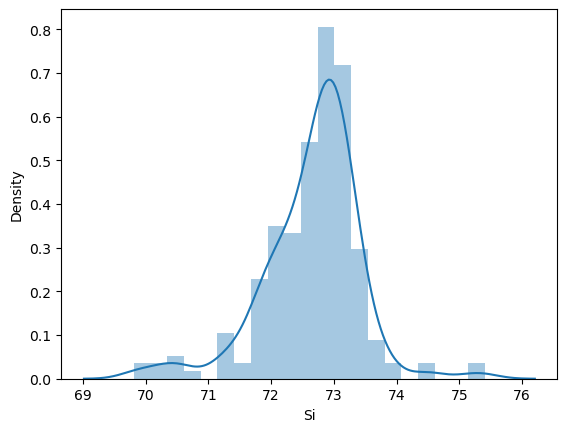

K


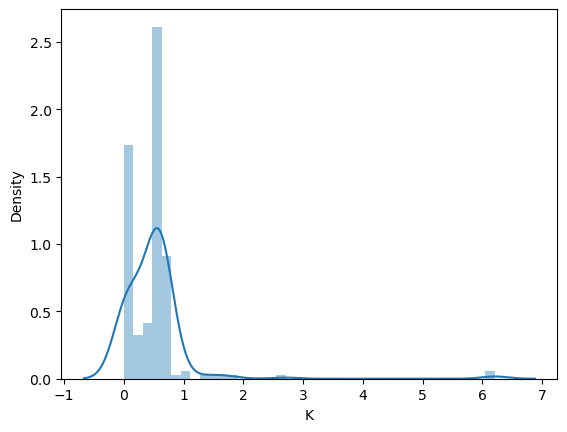

Ca


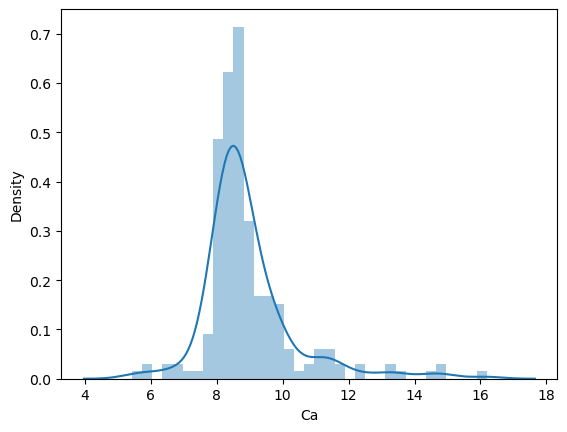

Ba


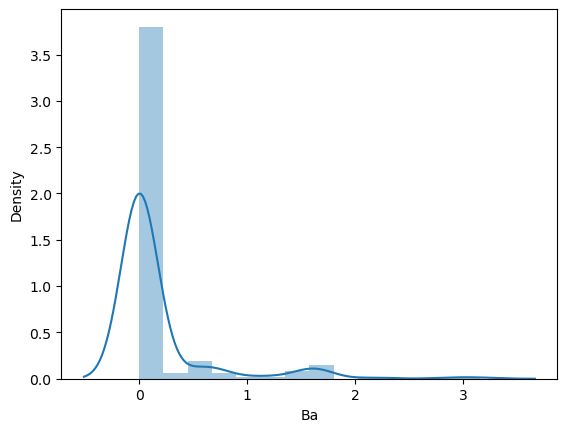

Fe


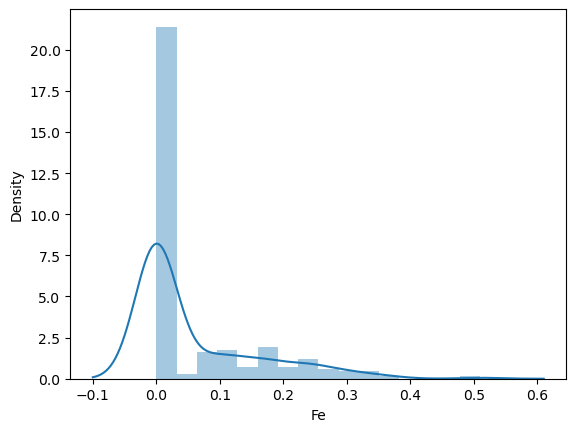

In [33]:
# Skewness

for x in glass.drop(['Type'], axis=1):
    print(x)
    plt.plot(figsize=(7,9))
    sns.distplot(glass[x])
    plt.show()

In [34]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [35]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.134327
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.452336
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.758289
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.585928
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.148072
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,0.053774
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.040670
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.523403
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.194903
Type,-0.134327,0.452336,-0.758289,0.585928,0.148072,0.053774,0.040670,0.523403,-0.194903,1.000000


<AxesSubplot:>

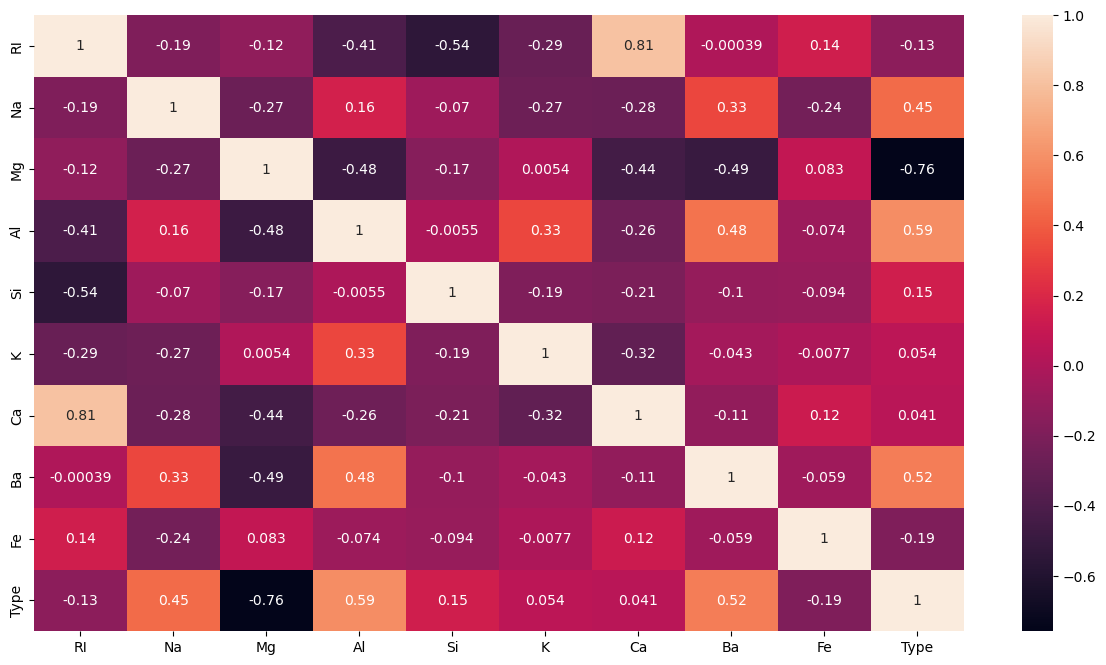

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(glass.corr(), annot= True)

In [37]:
glass.drop(['Type'], axis=1).corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


<AxesSubplot:>

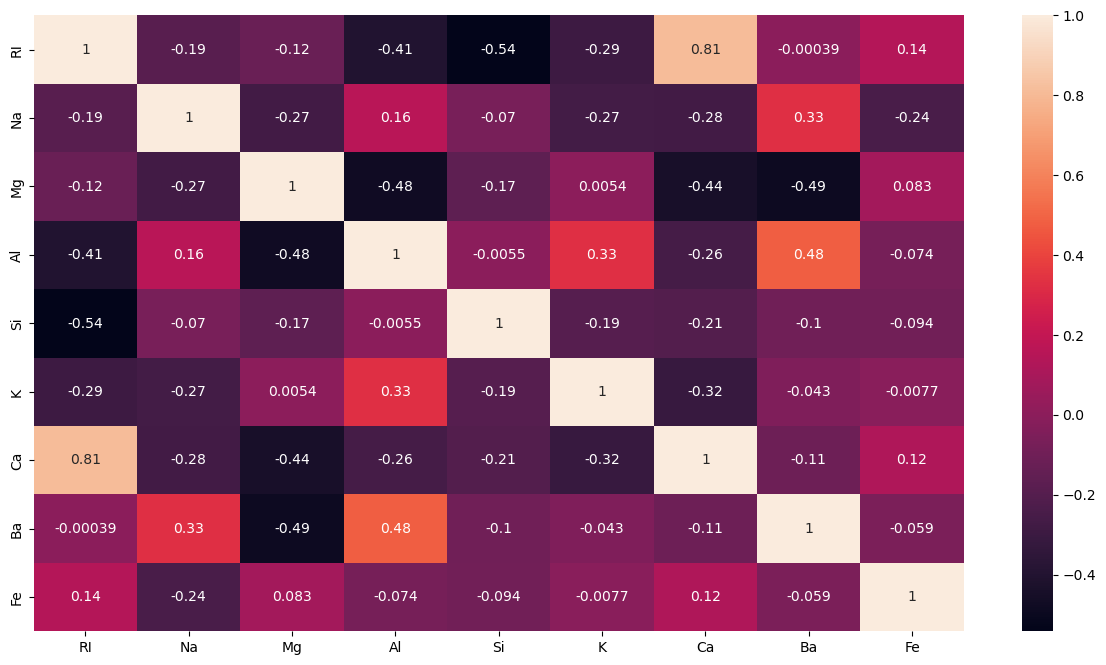

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(glass.drop(['Type'], axis=1).corr(), annot=True)

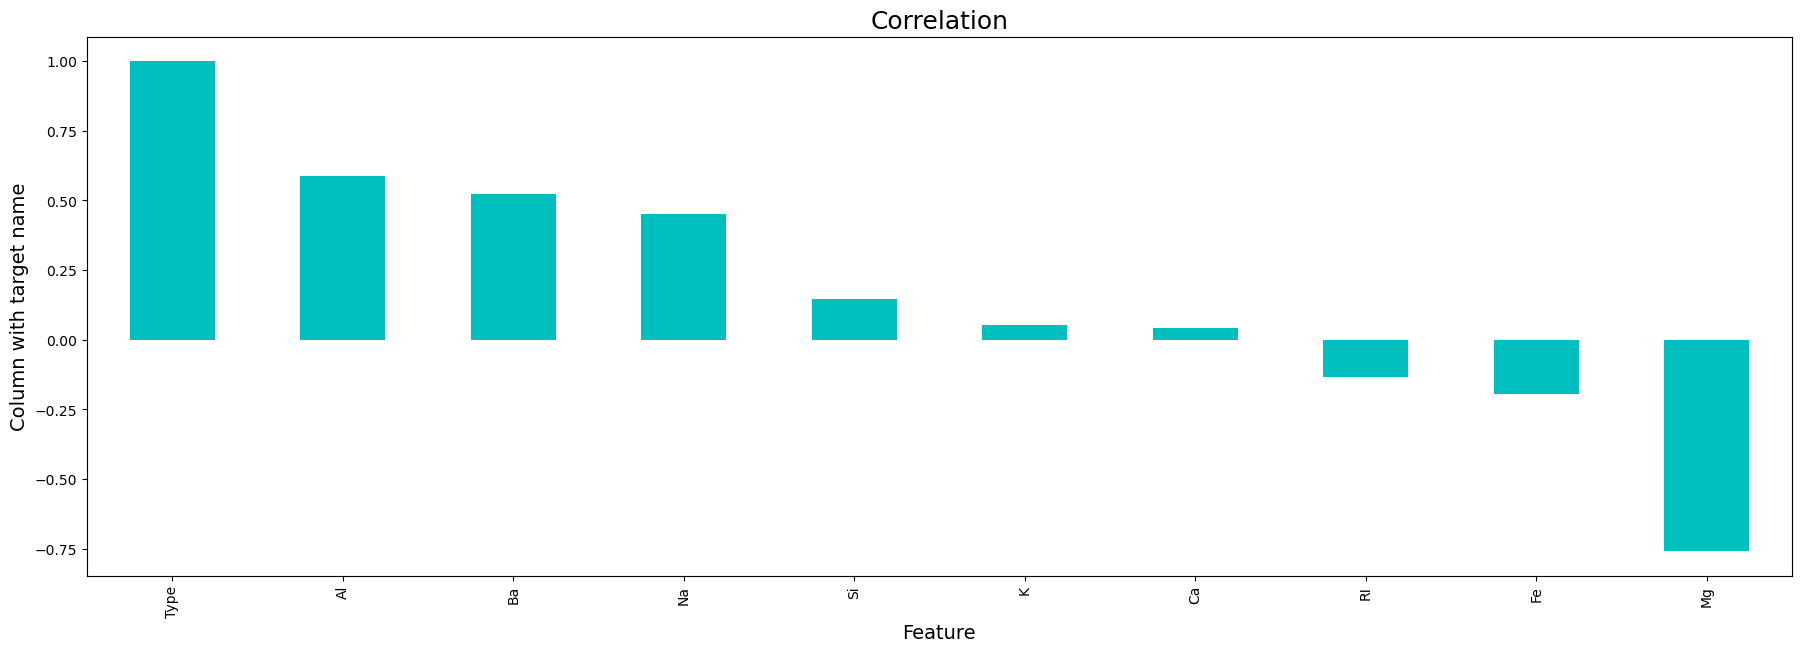

In [39]:
plt.figure(figsize=(22,7))
glass.corr()['Type'].sort_values(ascending= False).plot(kind= 'bar', color= 'c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Column with target name', fontsize=14)
plt.title('Correlation', fontsize=18)
plt.show()

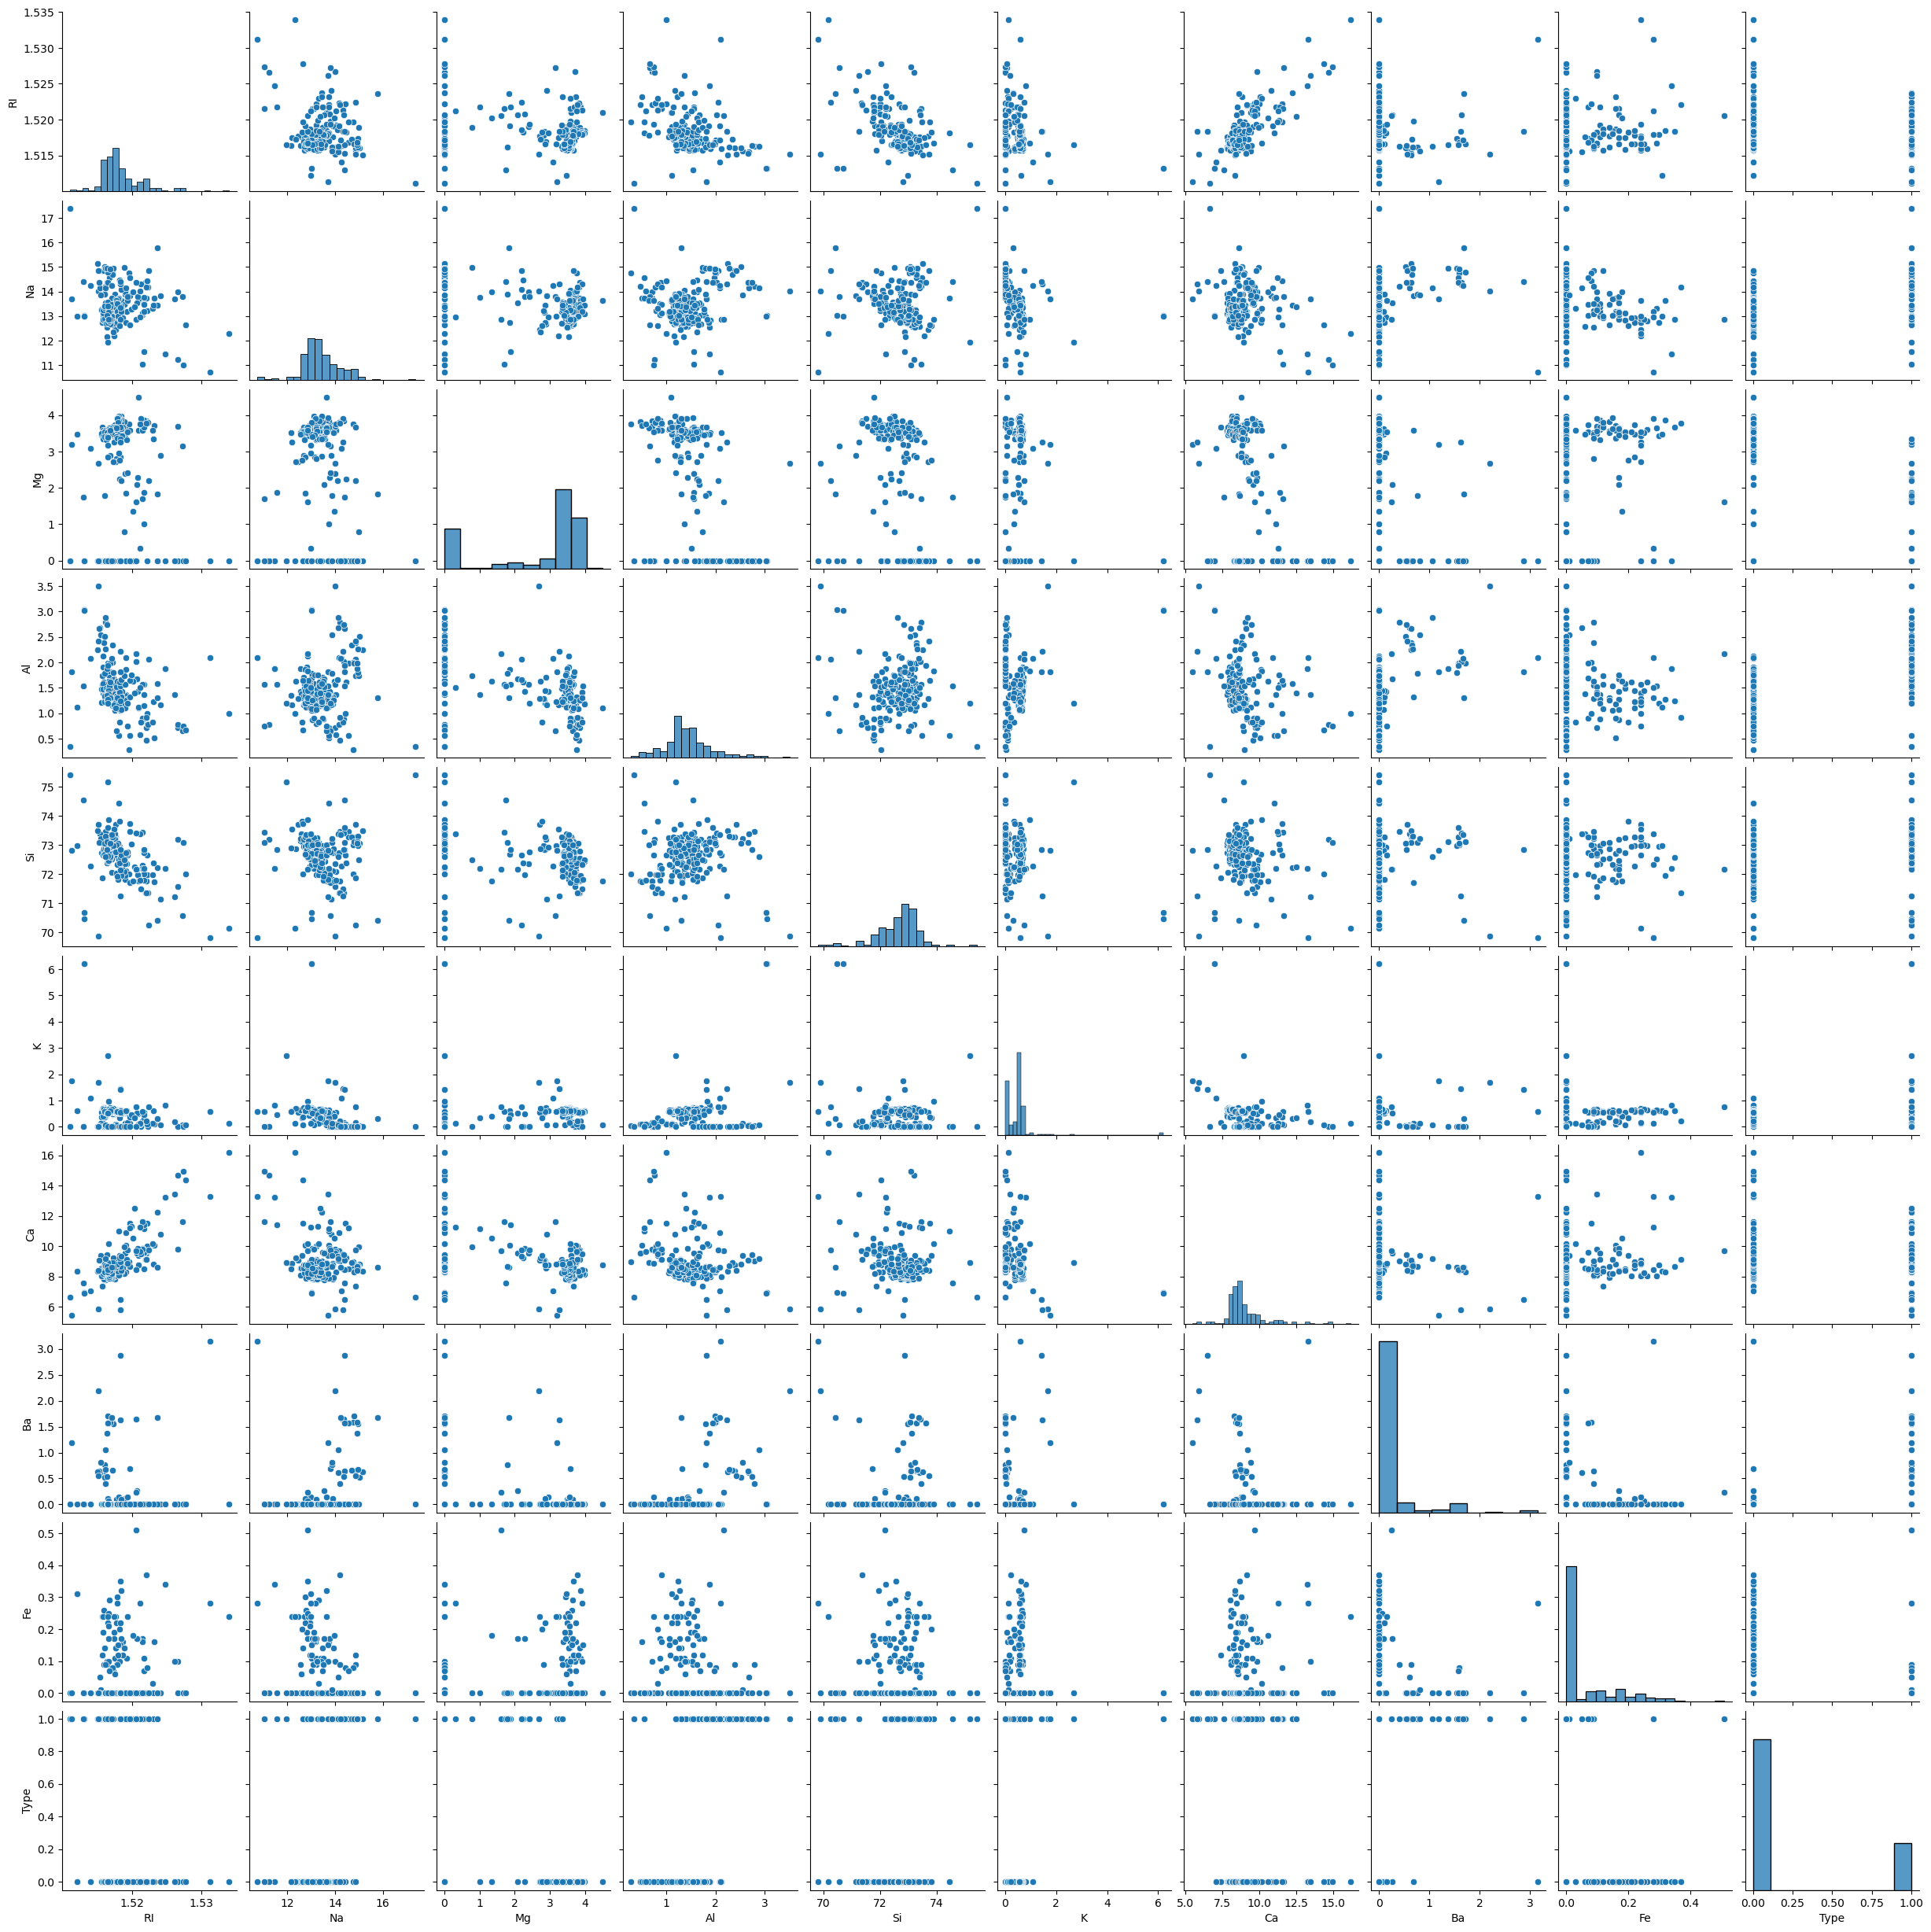

In [40]:
# Pairplot with target variable

sns.pairplot(glass)

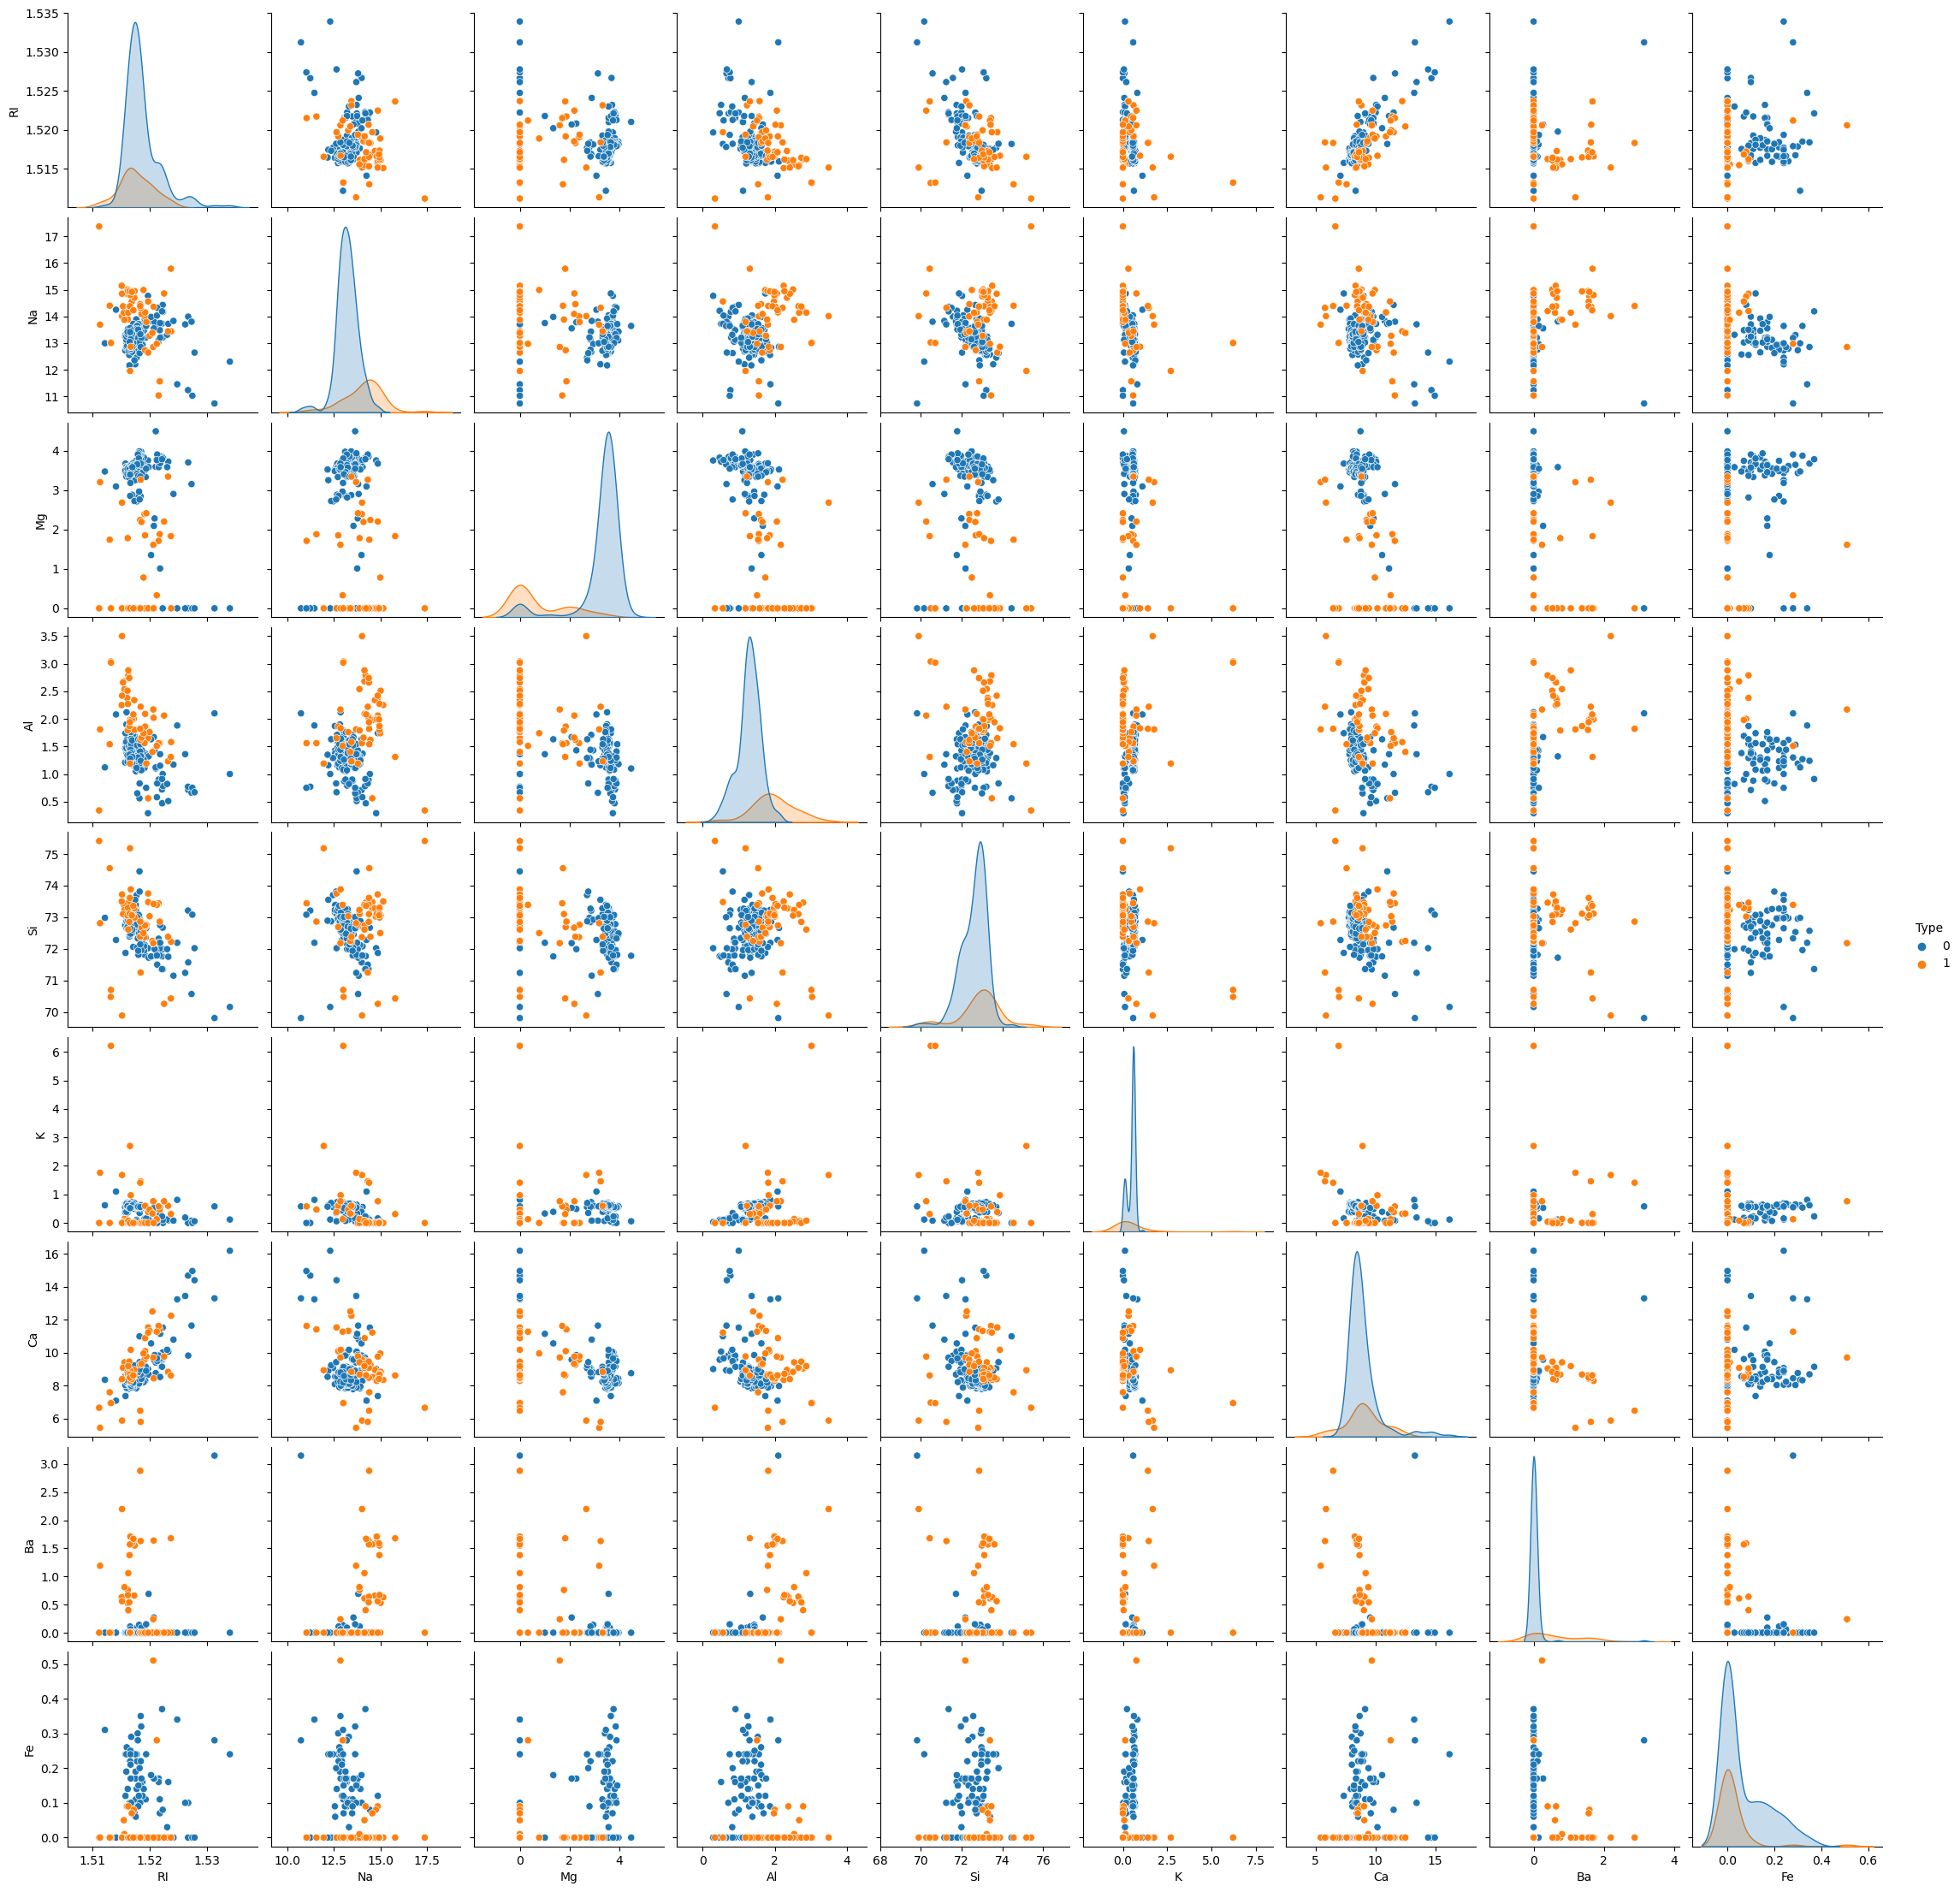

In [41]:
sns.pairplot(glass, hue='Type')

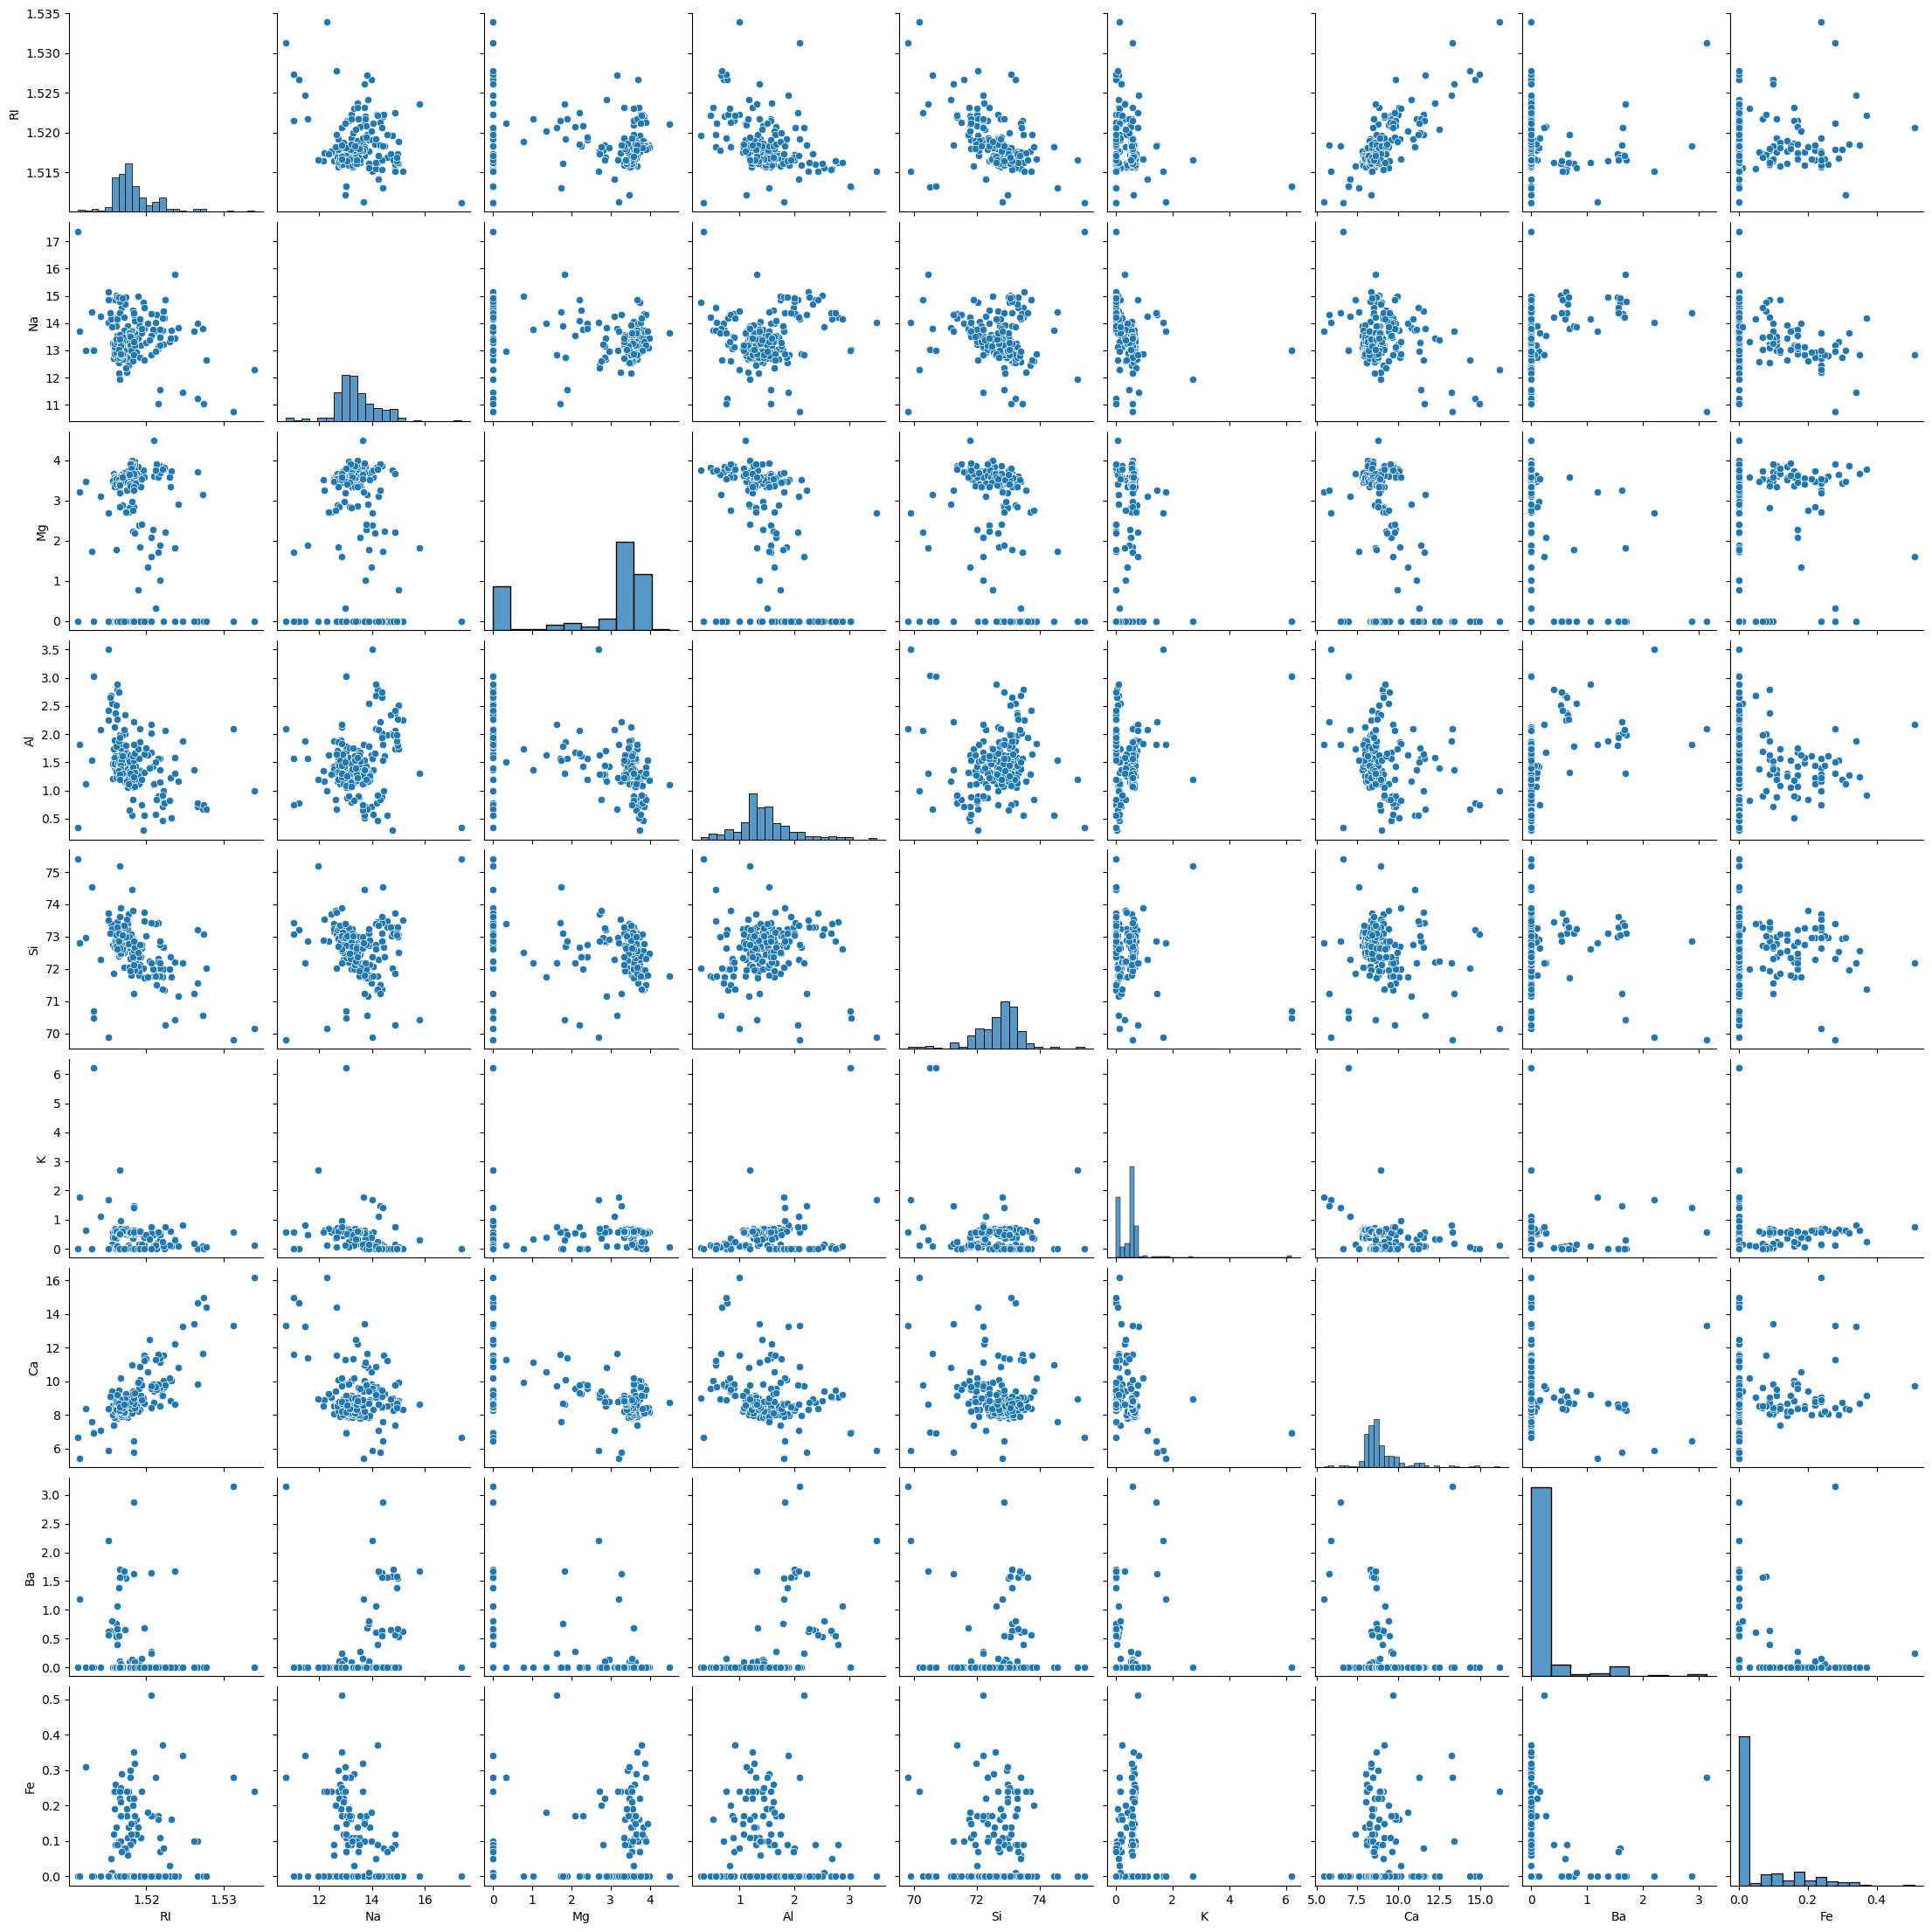

In [42]:
sns.pairplot(glass.drop(['Type'], axis=1))

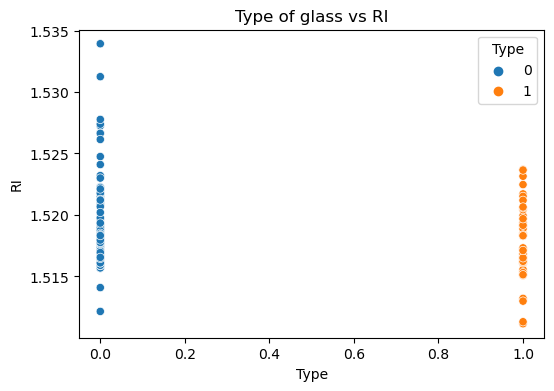

In [43]:
# Bivariate Analysis

plt.figure(figsize=(6,4))
plt.title('Type of glass vs RI')
sns.scatterplot(glass['Type'], glass['RI'], hue= glass['Type'])
plt.show()

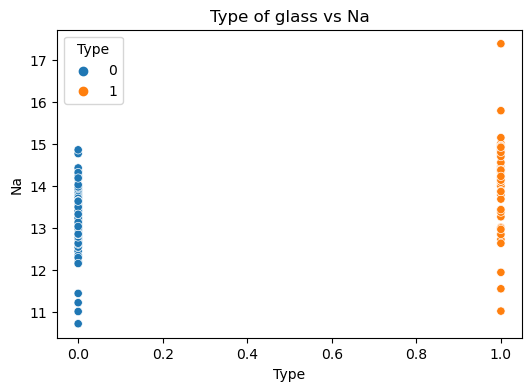

In [44]:
plt.figure(figsize=(6,4))
plt.title('Type of glass vs Na')
sns.scatterplot(glass['Type'], glass['Na'], hue= glass['Type'])
plt.show()

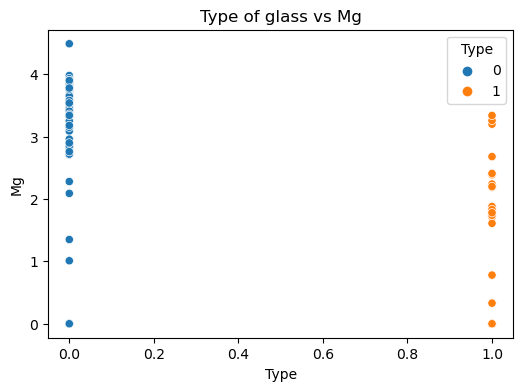

In [45]:
plt.figure(figsize=(6,4))
plt.title('Type of glass vs Mg')
sns.scatterplot(glass['Type'], glass['Mg'], hue= glass['Type'])
plt.show()

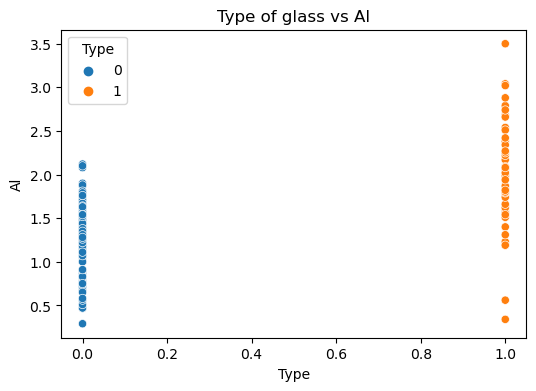

In [46]:
plt.figure(figsize=(6,4))
plt.title('Type of glass vs Al')
sns.scatterplot(glass['Type'], glass['Al'], hue= glass['Type'])
plt.show()

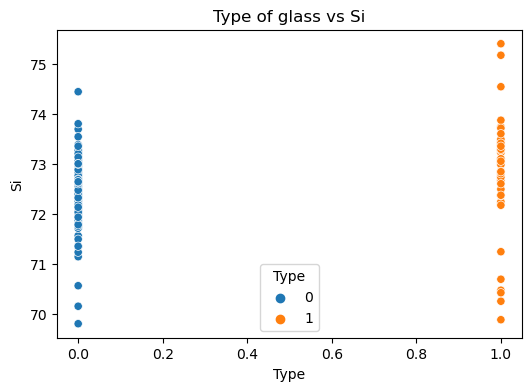

In [47]:
plt.figure(figsize=(6,4))
plt.title('Type of glass vs Si')
sns.scatterplot(glass['Type'], glass['Si'], hue= glass['Type'])
plt.show()

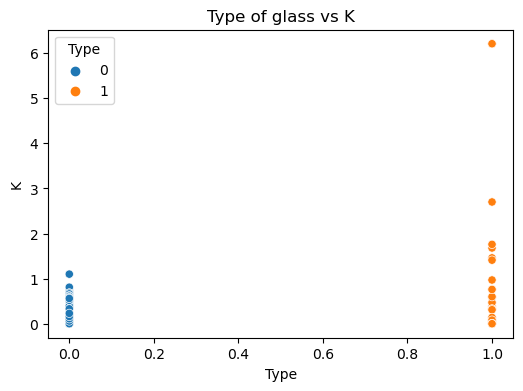

In [48]:
plt.figure(figsize=(6,4))
plt.title('Type of glass vs K')
sns.scatterplot(glass['Type'], glass['K'], hue= glass['Type'])
plt.show()

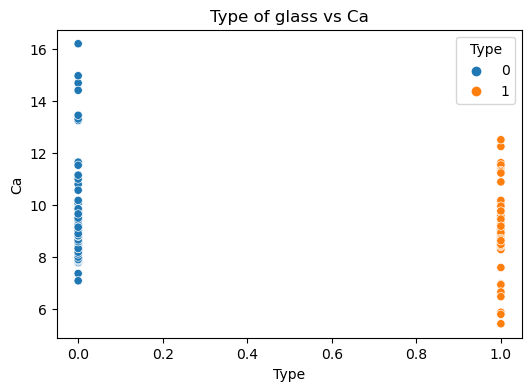

In [49]:
plt.figure(figsize=(6,4))
plt.title('Type of glass vs Ca')
sns.scatterplot(glass['Type'], glass['Ca'], hue= glass['Type'])
plt.show()

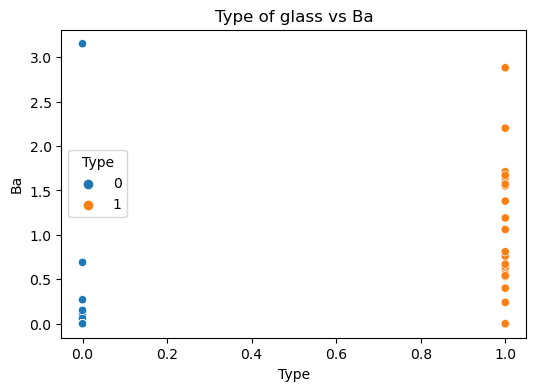

In [50]:
plt.figure(figsize=(6,4))
plt.title('Type of glass vs Ba')
sns.scatterplot(glass['Type'], glass['Ba'], hue= glass['Type'])
plt.show()

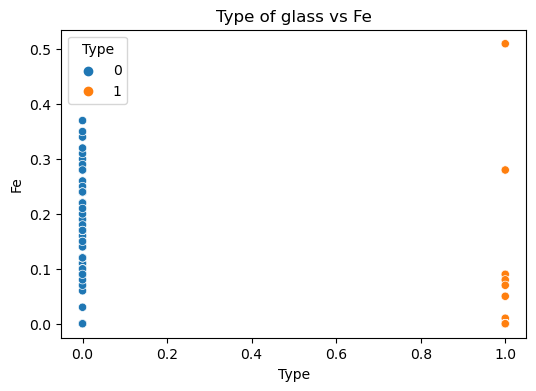

In [51]:
plt.figure(figsize=(6,4))
plt.title('Type of glass vs Fe')
sns.scatterplot(glass['Type'], glass['Fe'], hue= glass['Type'])
plt.show()

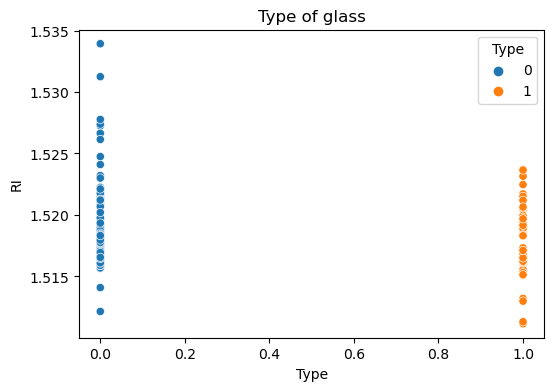

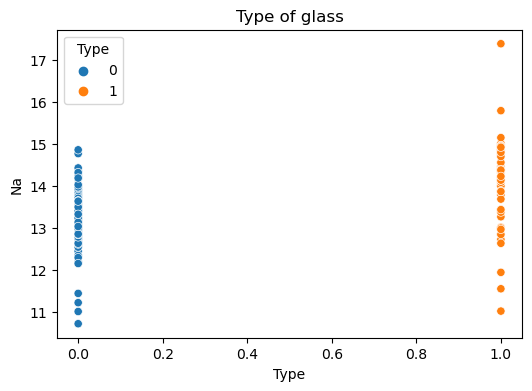

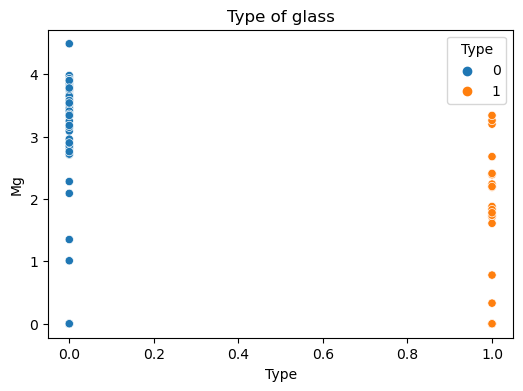

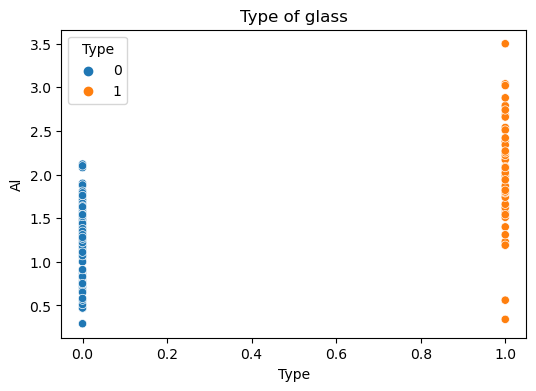

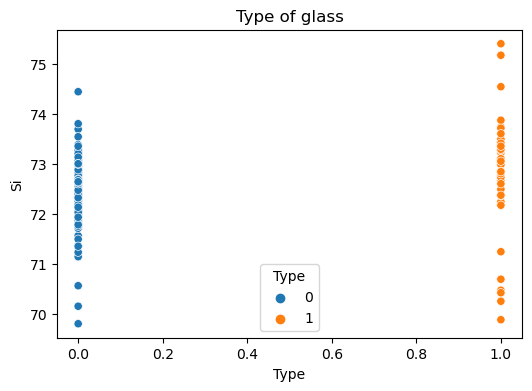

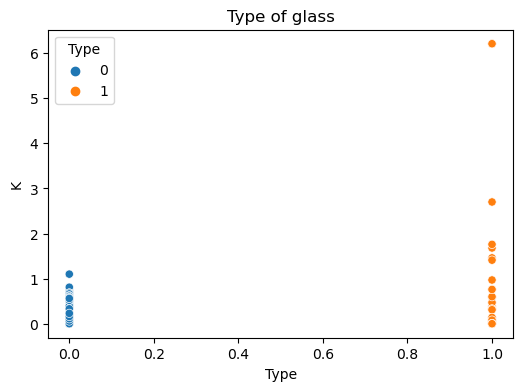

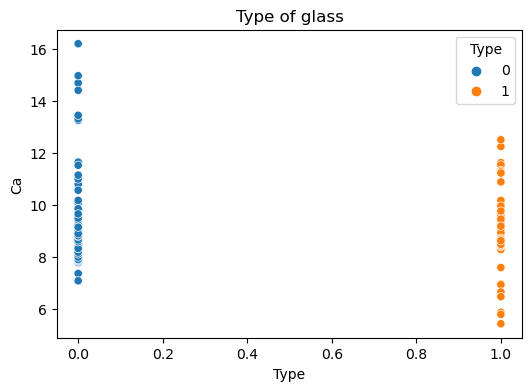

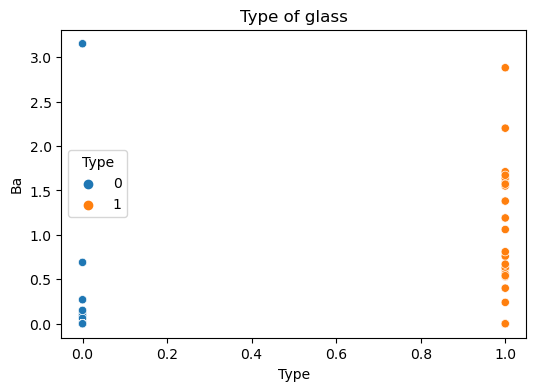

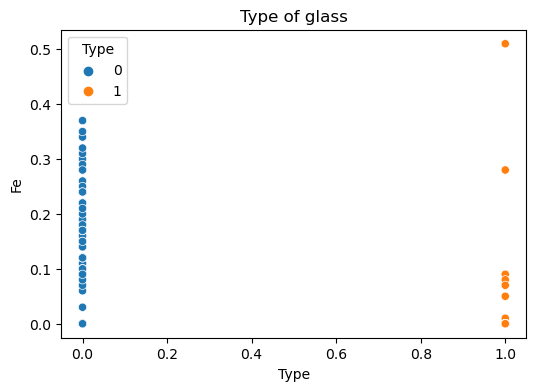

In [52]:
# Plot graph for correlation

for col in glass.drop(['Type'], axis=1):
    plt.figure(figsize=(6,4))
    plt.title('Type of glass')
    sns.scatterplot(glass['Type'], glass[col], hue= glass['Type'])
    plt.show()

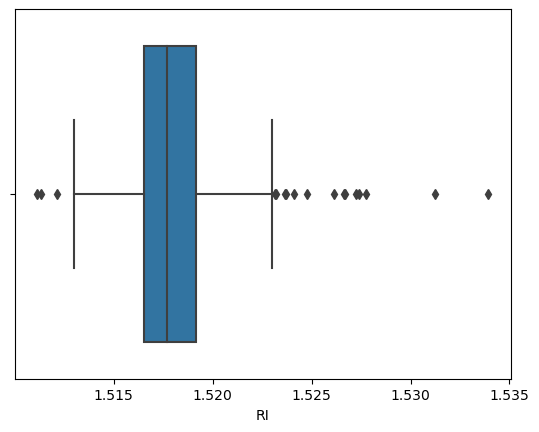

In [53]:
# Checking Outliears

plt.plot(figsize=(6,4))
sns.boxplot(glass['RI'])
plt.show()

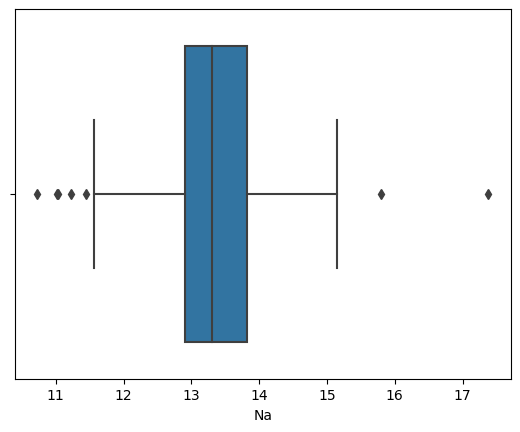

In [54]:
plt.plot(figsize=(6,4))
sns.boxplot(glass['Na'])
plt.show()

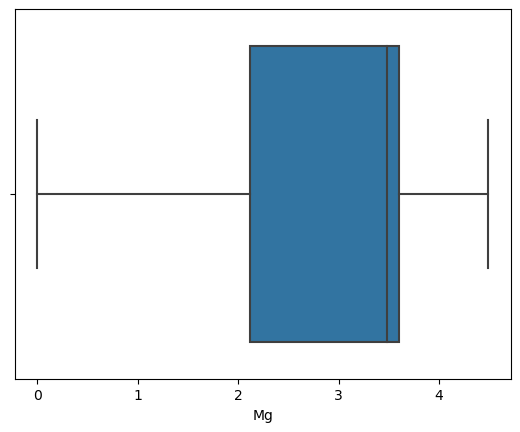

In [55]:
plt.plot(figsize=(6,4))
sns.boxplot(glass['Mg'])
plt.show()

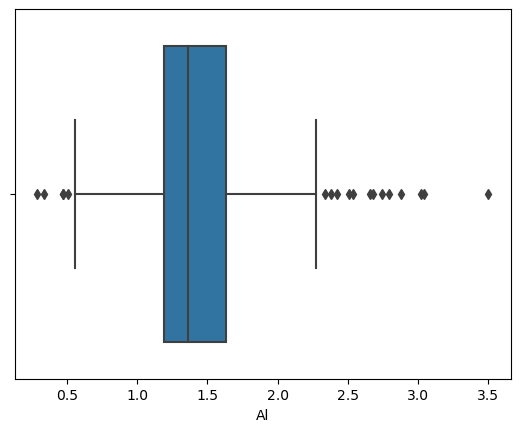

In [56]:
plt.plot(figsize=(6,4))
sns.boxplot(glass['Al'])
plt.show()

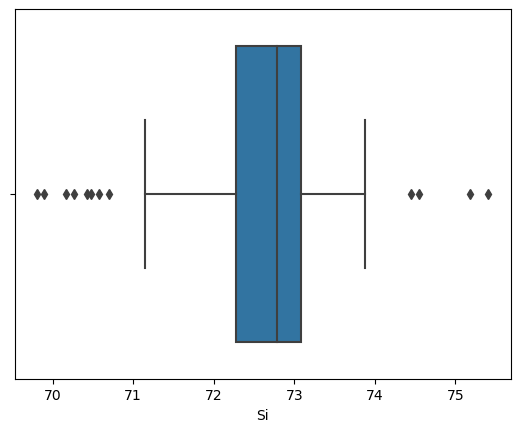

In [57]:
plt.plot(figsize=(6,4))
sns.boxplot(glass['Si'])
plt.show()

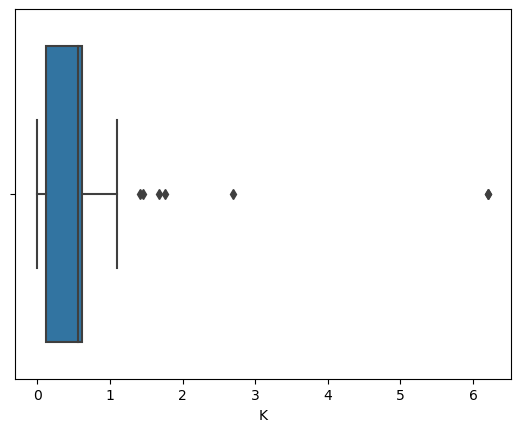

In [58]:
plt.plot(figsize=(6,4))
sns.boxplot(glass['K'])
plt.show()

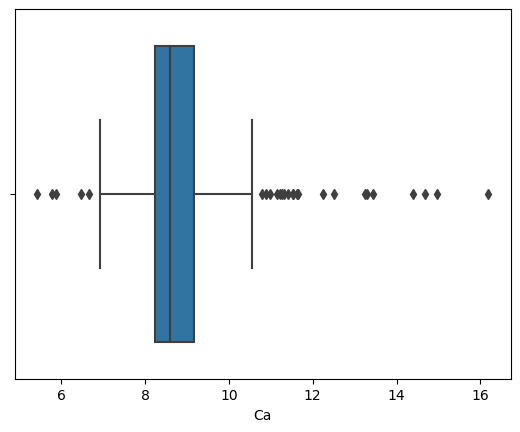

In [59]:
plt.plot(figsize=(6,4))
sns.boxplot(glass['Ca'])
plt.show()

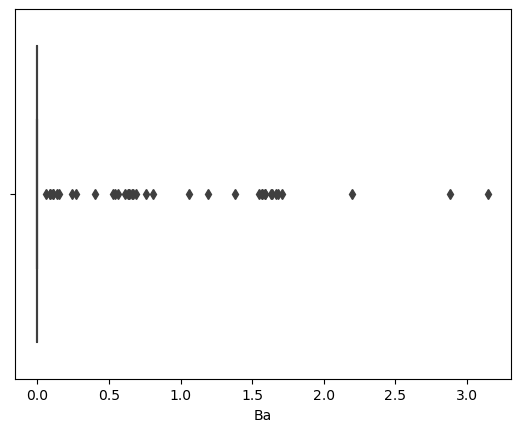

In [60]:
plt.plot(figsize=(6,4))
sns.boxplot(glass['Ba'])
plt.show()

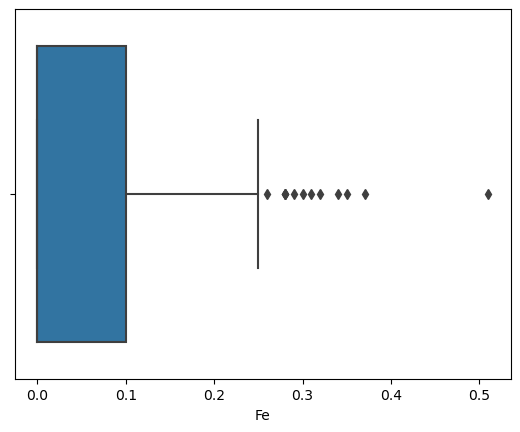

In [61]:
plt.plot(figsize=(6,4))
sns.boxplot(glass['Fe'])
plt.show()

In [62]:
glass['Ba'].skew()

3.4164245693025577

In [63]:
glass.drop(['Ba'], axis=1, inplace= True)

In [64]:
x= glass.drop(['Type'], axis=1)
y= glass['Type']

In [65]:
x.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0


In [66]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Type, dtype: int64

In [67]:
x.shape

(214, 8)

In [68]:
y.shape

(214,)

<AxesSubplot:>

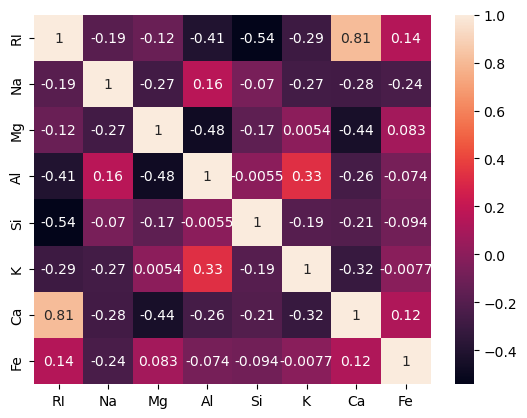

In [69]:
# Checking multicollinearity

sns.heatmap(x.corr(), annot= True)

In [70]:
def vif_calc():
    vif= pd.DataFrame()
    vif["VIF Factor"]= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['features']= x.columns
    print(vif)

In [71]:
vif_calc()

     VIF Factor features
0  50532.257929       RI
1   1446.004313       Na
2     48.844414       Mg
3     36.554198       Al
4  26603.662196       Si
5      4.971654        K
6    542.857707       Ca
7      1.472500       Fe


In [72]:
# Standard Scaler

sc= StandardScaler()
x= sc.fit_transform(x)
x

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.67170546,
        -0.14576634, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.02621325,
        -0.79373376, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.16453301,
        -0.82894938, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.76391864,
        -0.36410319, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.76391864,
        -0.33593069, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.76391864,
        -0.23732695, -0.5864509 ]])

In [73]:
y.value_counts()

0    163
1     51
Name: Type, dtype: int64

In [74]:
sm= SMOTE()
x,y= sm.fit_resample(x,y)

In [75]:
y.value_counts()

0    163
1    163
Name: Type, dtype: int64

In [76]:
# Logistic Regression

lr= LogisticRegression()

In [77]:
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=i, test_size=0.25, stratify= y)
    lr.fit(x_train, y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,1)== round(accuracy_score(y_test, pred_test)*100,1):
        print('At random state', i, 'The model perform well')
        print('Random State= ', i)
        print("Training accuracy score is = ", accuracy_score(y_train, pred_train))
        print("Test accuracy score is = ", accuracy_score(y_test, pred_test))
        print('\n')

At random state 32 The model perform well
Random State=  32
Training accuracy score is =  0.9508196721311475
Test accuracy score is =  0.9512195121951219


At random state 43 The model perform well
Random State=  43
Training accuracy score is =  0.9508196721311475
Test accuracy score is =  0.9512195121951219


At random state 76 The model perform well
Random State=  76
Training accuracy score is =  0.9508196721311475
Test accuracy score is =  0.9512195121951219


At random state 91 The model perform well
Random State=  91
Training accuracy score is =  0.9508196721311475
Test accuracy score is =  0.9512195121951219


At random state 106 The model perform well
Random State=  106
Training accuracy score is =  0.9508196721311475
Test accuracy score is =  0.9512195121951219


At random state 145 The model perform well
Random State=  145
Training accuracy score is =  0.9508196721311475
Test accuracy score is =  0.9512195121951219


At random state 150 The model perform well
Random State=  15

In [78]:
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=777, test_size=0.25, stratify=y)

In [79]:
y_train.value_counts()

1    122
0    122
Name: Type, dtype: int64

In [80]:
lr.fit(x_train, y_train)
pred_lr= lr.predict(x_test)
print('Accuracy of model =', accuracy_score(y_test,pred_lr)*100, '%',)
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, pred_lr))
print('\n')
print('Classification Report', '\n', classification_report(y_test, pred_lr))

Accuracy of model = 95.1219512195122 %


Confusion matrix 
 [[39  2]
 [ 2 39]]


Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.95      0.95      0.95        41

    accuracy                           0.95        82
   macro avg       0.95      0.95      0.95        82
weighted avg       0.95      0.95      0.95        82



In [81]:
pred_lr_ac= accuracy_score(y_test, pred_lr)
for i in range(2,15):
    lsscore= cross_val_score(lr,x,y,cv=i)
    lsc= lsscore.mean()
    print('At cv =', i)
    print('Cross validation score is =', lsc*100)
    print('Accuracy score is =', pred_lr_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 91.71779141104295
Accuracy score is = 95.1219512195122


At cv = 3
Cross validation score is = 93.55532902933516
Accuracy score is = 95.1219512195122


At cv = 4
Cross validation score is = 92.62646793134599
Accuracy score is = 95.1219512195122


At cv = 5
Cross validation score is = 92.34032634032636
Accuracy score is = 95.1219512195122


At cv = 6
Cross validation score is = 93.55780022446689
Accuracy score is = 95.1219512195122


At cv = 7
Cross validation score is = 93.22717060922426
Accuracy score is = 95.1219512195122


At cv = 8
Cross validation score is = 92.9420731707317
Accuracy score is = 95.1219512195122


At cv = 9
Cross validation score is = 94.19419419419418
Accuracy score is = 95.1219512195122


At cv = 10
Cross validation score is = 93.21969696969697
Accuracy score is = 95.1219512195122


At cv = 11
Cross validation score is = 92.88401253918495
Accuracy score is = 95.1219512195122


At cv = 12
Cross validation score is = 94.2129629

In [82]:
lsscore_selected= cross_val_score(lr,x,y,cv=14)
print('Cross validation score =', lsscore_selected.mean()*100, '\n', 'Accuracy score =', pred_lr_ac*100)

Cross validation score = 93.86645962732919 
 Accuracy score = 95.1219512195122


In [85]:
gb= GradientBoostingClassifier()
ada= AdaBoostClassifier()
bg= BaggingClassifier()
rfc= RandomForestClassifier()
ext= ExtraTreesClassifier()
gnb= GaussianNB()
svc= SVC()
dtc= DecisionTreeClassifier()
knn= KNeighborsClassifier()

In [88]:
# Gradient Boosting Classifier

gb.fit(x_train, y_train)
pred_gb= gb.predict(x_test)
print('Accuracy of model =', accuracy_score(y_test, pred_gb)*100)
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, pred_gb))
print('\n')
print('Classification Report', '\n', classification_report(y_test, pred_gb))

Accuracy of model = 95.1219512195122


Confusion matrix 
 [[39  2]
 [ 2 39]]


Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.95      0.95      0.95        41

    accuracy                           0.95        82
   macro avg       0.95      0.95      0.95        82
weighted avg       0.95      0.95      0.95        82



In [89]:
pred_gb_ac= accuracy_score(y_test, pred_gb)
for i in range(2,15):
    gsscore= cross_val_score(gb, x, y, cv=i)
    gsc= gsscore.mean()
    print('At cv =', i)
    print('Cross validation score is =', gsc*100)
    print('Accuracy score is =', pred_gb_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 94.1717791411043
Accuracy score is = 95.1219512195122


At cv = 3
Cross validation score is = 93.86680258239892
Accuracy score is = 95.1219512195122


At cv = 4
Cross validation score is = 93.53357422463114
Accuracy score is = 95.1219512195122


At cv = 5
Cross validation score is = 95.1002331002331
Accuracy score is = 95.1219512195122


At cv = 6
Cross validation score is = 94.46689113355781
Accuracy score is = 95.1219512195122


At cv = 7
Cross validation score is = 95.67199682833355
Accuracy score is = 95.1219512195122


At cv = 8
Cross validation score is = 93.5594512195122
Accuracy score is = 95.1219512195122


At cv = 9
Cross validation score is = 95.10343677010344
Accuracy score is = 95.1219512195122


At cv = 10
Cross validation score is = 94.43181818181819
Accuracy score is = 95.1219512195122


At cv = 11
Cross validation score is = 94.43051201671892
Accuracy score is = 95.1219512195122


At cv = 12
Cross validation score is = 96.042768959

In [91]:
gsscore_selected= cross_val_score(gb,x,y,cv=9)
print('Cross validation score =', gsscore_selected.mean()*100, '\n', 'Accuracy score =', pred_gb_ac*100)

Cross validation score = 95.10343677010344 
 Accuracy score = 95.1219512195122


In [92]:
# Ada Boost Classifier

ada.fit(x_train, y_train)
pred_ada= ada.predict(x_test)
print('Accuracy of model =', accuracy_score(y_test, pred_ada)*100)
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, pred_ada))
print('\n')
print('Classification Report', '\n', classification_report(y_test, pred_ada))

Accuracy of model = 96.34146341463415


Confusion matrix 
 [[40  1]
 [ 2 39]]


Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.97      0.95      0.96        41

    accuracy                           0.96        82
   macro avg       0.96      0.96      0.96        82
weighted avg       0.96      0.96      0.96        82



In [93]:
pred_ada_ac= accuracy_score(y_test, pred_ada)
for i in range(2,15):
    gsscore= cross_val_score(ada, x, y, cv=i)
    gsc= gsscore.mean()
    print('At cv =', i)
    print('Cross validation score is =', gsc*100)
    print('Accuracy score is =', pred_ada_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 93.55828220858895
Accuracy score is = 96.34146341463415


At cv = 3
Cross validation score is = 93.56099218484539
Accuracy score is = 96.34146341463415


At cv = 4
Cross validation score is = 90.16485998193315
Accuracy score is = 96.34146341463415


At cv = 5
Cross validation score is = 94.17715617715618
Accuracy score is = 96.34146341463415


At cv = 6
Cross validation score is = 94.1638608305275
Accuracy score is = 96.34146341463415


At cv = 7
Cross validation score is = 92.896788687723
Accuracy score is = 96.34146341463415


At cv = 8
Cross validation score is = 91.73018292682926
Accuracy score is = 96.34146341463415


At cv = 9
Cross validation score is = 94.16916916916917
Accuracy score is = 96.34146341463415


At cv = 10
Cross validation score is = 93.51325757575758
Accuracy score is = 96.34146341463415


At cv = 11
Cross validation score is = 93.20794148380357
Accuracy score is = 96.34146341463415


At cv = 12
Cross validation score is = 95

In [94]:
gsscore_selected= cross_val_score(ada,x,y,cv=9)
print('Cross validation score =', gsscore_selected.mean()*100, '\n', 'Accuracy score =', pred_ada_ac*100)

Cross validation score = 94.16916916916917 
 Accuracy score = 96.34146341463415


In [95]:
# Bagging Classifier

bg.fit(x_train, y_train)
pred_bg= bg.predict(x_test)
print('Accuracy of model =', accuracy_score(y_test, pred_bg)*100)
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, pred_bg))
print('\n')
print('Classification Report', '\n', classification_report(y_test, pred_bg))

Accuracy of model = 93.90243902439023


Confusion matrix 
 [[39  2]
 [ 3 38]]


Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.95      0.93      0.94        41

    accuracy                           0.94        82
   macro avg       0.94      0.94      0.94        82
weighted avg       0.94      0.94      0.94        82



In [96]:
pred_bg_ac= accuracy_score(y_test, pred_bg)
for i in range(2,15):
    bgsscore= cross_val_score(bg, x, y, cv=i)
    bgsc= bgsscore.mean()
    print('At cv =', i)
    print('Cross validation score is =', bgsc*100)
    print('Accuracy score is =', pred_bg_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 94.1717791411043
Accuracy score is = 93.90243902439023


At cv = 3
Cross validation score is = 93.86113942688866
Accuracy score is = 93.90243902439023


At cv = 4
Cross validation score is = 93.8384522734116
Accuracy score is = 93.90243902439023


At cv = 5
Cross validation score is = 95.0955710955711
Accuracy score is = 93.90243902439023


At cv = 6
Cross validation score is = 94.47811447811448
Accuracy score is = 93.90243902439023


At cv = 7
Cross validation score is = 93.51129906171535
Accuracy score is = 93.90243902439023


At cv = 8
Cross validation score is = 94.47408536585365
Accuracy score is = 93.90243902439023


At cv = 9
Cross validation score is = 96.02936269602935
Accuracy score is = 93.90243902439023


At cv = 10
Cross validation score is = 95.01893939393939
Accuracy score is = 93.90243902439023


At cv = 11
Cross validation score is = 93.19749216300941
Accuracy score is = 93.90243902439023


At cv = 12
Cross validation score is = 94

In [97]:
lsscore_selected= cross_val_score(bg,x,y,cv=4)
print('Cross validation score =', lsscore_selected.mean()*100, '\n', 'Accuracy score =', pred_bg_ac*100)

Cross validation score = 94.77943390545018 
 Accuracy score = 93.90243902439023


In [98]:
# Random Forest Classifier

rfc.fit(x_train, y_train)
pred_rfc= rfc.predict(x_test)
print('Accuracy of model =', accuracy_score(y_test, pred_rfc)*100)
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, pred_rfc))
print('\n')
print('Classification Report', '\n', classification_report(y_test, pred_rfc))

Accuracy of model = 95.1219512195122


Confusion matrix 
 [[39  2]
 [ 2 39]]


Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.95      0.95      0.95        41

    accuracy                           0.95        82
   macro avg       0.95      0.95      0.95        82
weighted avg       0.95      0.95      0.95        82



In [99]:
pred_rfc_ac= accuracy_score(y_test, pred_rfc)
for i in range(2,15):
    gsscore= cross_val_score(rfc, x, y, cv=i)
    gsc= gsscore.mean()
    print('At cv =', i)
    print('Cross validation score is =', gsc*100)
    print('Accuracy score is =', pred_rfc_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 94.78527607361964
Accuracy score is = 95.1219512195122


At cv = 3
Cross validation score is = 95.69600181220976
Accuracy score is = 95.1219512195122


At cv = 4
Cross validation score is = 95.37789822342668
Accuracy score is = 95.1219512195122


At cv = 5
Cross validation score is = 95.6969696969697
Accuracy score is = 95.1219512195122


At cv = 6
Cross validation score is = 95.0729517396184
Accuracy score is = 95.1219512195122


At cv = 7
Cross validation score is = 95.05748645434122
Accuracy score is = 95.1219512195122


At cv = 8
Cross validation score is = 95.38871951219512
Accuracy score is = 95.1219512195122


At cv = 9
Cross validation score is = 95.38705372038704
Accuracy score is = 95.1219512195122


At cv = 10
Cross validation score is = 95.3409090909091
Accuracy score is = 95.1219512195122


At cv = 11
Cross validation score is = 95.03657262277952
Accuracy score is = 95.1219512195122


At cv = 12
Cross validation score is = 96.009700176

In [100]:
gsscore_selected= cross_val_score(rfc,x,y,cv=13)
print('Cross validation score =', gsscore_selected.mean()*100, '\n', 'Accuracy score =', pred_rfc_ac*100)

Cross validation score = 95.39644970414203 
 Accuracy score = 95.1219512195122


In [101]:
# Extra Trees Classifier

ext.fit(x_train, y_train)
pred_ext= ext.predict(x_test)
print('Accuracy of model =', accuracy_score(y_test, pred_ext)*100)
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, pred_ext))
print('\n')
print('Classification Report', '\n', classification_report(y_test, pred_ext))

Accuracy of model = 92.6829268292683


Confusion matrix 
 [[38  3]
 [ 3 38]]


Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        41
           1       0.93      0.93      0.93        41

    accuracy                           0.93        82
   macro avg       0.93      0.93      0.93        82
weighted avg       0.93      0.93      0.93        82



In [102]:
pred_ext_ac= accuracy_score(y_test, pred_ext)
for i in range(2,15):
    gsscore= cross_val_score(ext, x, y, cv=i)
    gsc= gsscore.mean()
    print('At cv =', i)
    print('Cross validation score is =', gsc*100)
    print('Accuracy score is =', pred_ext_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 95.39877300613497
Accuracy score is = 92.6829268292683


At cv = 3
Cross validation score is = 95.69317023445464
Accuracy score is = 92.6829268292683


At cv = 4
Cross validation score is = 95.37789822342668
Accuracy score is = 92.6829268292683


At cv = 5
Cross validation score is = 95.39393939393939
Accuracy score is = 92.6829268292683


At cv = 6
Cross validation score is = 95.68462401795735
Accuracy score is = 92.6829268292683


At cv = 7
Cross validation score is = 95.36143782212237
Accuracy score is = 92.6829268292683


At cv = 8
Cross validation score is = 95.6935975609756
Accuracy score is = 92.6829268292683


At cv = 9
Cross validation score is = 96.00433767100434
Accuracy score is = 92.6829268292683


At cv = 10
Cross validation score is = 95.9659090909091
Accuracy score is = 92.6829268292683


At cv = 11
Cross validation score is = 95.64263322884014
Accuracy score is = 92.6829268292683


At cv = 12
Cross validation score is = 96.61596119

In [103]:
gsscore_selected= cross_val_score(ext,x,y,cv=2)
print('Cross validation score =', gsscore_selected.mean()*100, '\n', 'Accuracy score =', pred_ext_ac*100)

Cross validation score = 94.78527607361964 
 Accuracy score = 92.6829268292683


In [104]:
# GaussianNB

gnb.fit(x_train, y_train)
pred_gnb= gnb.predict(x_test)
print('Accuracy of model =', accuracy_score(y_test, pred_gnb)*100)
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, pred_gnb))
print('\n')
print('Classification Report', '\n', classification_report(y_test, pred_gnb))

Accuracy of model = 89.02439024390245


Confusion matrix 
 [[39  2]
 [ 7 34]]


Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.94      0.83      0.88        41

    accuracy                           0.89        82
   macro avg       0.90      0.89      0.89        82
weighted avg       0.90      0.89      0.89        82



In [105]:
pred_gnb_ac= accuracy_score(y_test, pred_gnb)
for i in range(2,15):
    gsscore= cross_val_score(gnb, x, y, cv=i)
    gsc= gsscore.mean()
    print('At cv =', i)
    print('Cross validation score is =', gsc*100)
    print('Accuracy score is =', pred_gnb_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 91.41104294478528
Accuracy score is = 89.02439024390245


At cv = 3
Cross validation score is = 90.4887303205346
Accuracy score is = 89.02439024390245


At cv = 4
Cross validation score is = 90.16862390846131
Accuracy score is = 89.02439024390245


At cv = 5
Cross validation score is = 89.8834498834499
Accuracy score is = 89.02439024390245


At cv = 6
Cross validation score is = 90.16835016835016
Accuracy score is = 89.02439024390245


At cv = 7
Cross validation score is = 89.83084445619136
Accuracy score is = 89.02439024390245


At cv = 8
Cross validation score is = 89.2530487804878
Accuracy score is = 89.02439024390245


At cv = 9
Cross validation score is = 90.49049049049047
Accuracy score is = 89.02439024390245


At cv = 10
Cross validation score is = 89.50757575757576
Accuracy score is = 89.02439024390245


At cv = 11
Cross validation score is = 90.11494252873563
Accuracy score is = 89.02439024390245


At cv = 12
Cross validation score is = 89

In [106]:
gsscore_selected= cross_val_score(ext,x,y,cv=9)
print('Cross validation score =', gsscore_selected.mean()*100, '\n', 'Accuracy score =', pred_gnb_ac*100)

Cross validation score = 96.00433767100434 
 Accuracy score = 89.02439024390245


In [107]:
# SVC

svc.fit(x_train, y_train)
pred_svc= gnb.predict(x_test)
print('Accuracy of model =', accuracy_score(y_test, pred_svc)*100)
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, pred_svc))
print('\n')
print('Classification Report', '\n', classification_report(y_test, pred_svc))

Accuracy of model = 89.02439024390245


Confusion matrix 
 [[39  2]
 [ 7 34]]


Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.94      0.83      0.88        41

    accuracy                           0.89        82
   macro avg       0.90      0.89      0.89        82
weighted avg       0.90      0.89      0.89        82



In [108]:
pred_svc_ac= accuracy_score(y_test, pred_svc)
for i in range(2,15):
    gsscore= cross_val_score(svc, x, y, cv=i)
    gsc= gsscore.mean()
    print('At cv =', i)
    print('Cross validation score is =', gsc*100)
    print('Accuracy score is =', pred_svc_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 95.39877300613497
Accuracy score is = 89.02439024390245


At cv = 3
Cross validation score is = 96.00464378751842
Accuracy score is = 89.02439024390245


At cv = 4
Cross validation score is = 95.68277627220716
Accuracy score is = 89.02439024390245


At cv = 5
Cross validation score is = 95.6969696969697
Accuracy score is = 89.02439024390245


At cv = 6
Cross validation score is = 95.993265993266
Accuracy score is = 89.02439024390245


At cv = 7
Cross validation score is = 95.66538918990352
Accuracy score is = 89.02439024390245


At cv = 8
Cross validation score is = 95.70121951219512
Accuracy score is = 89.02439024390245


At cv = 9
Cross validation score is = 95.995995995996
Accuracy score is = 89.02439024390245


At cv = 10
Cross validation score is = 95.64393939393939
Accuracy score is = 89.02439024390245


At cv = 11
Cross validation score is = 95.63218390804597
Accuracy score is = 89.02439024390245


At cv = 12
Cross validation score is = 96.6

In [109]:
gsscore_selected= cross_val_score(ext,x,y,cv=8)
print('Cross validation score =', gsscore_selected.mean()*100, '\n', 'Accuracy score =', pred_svc_ac*100)

Cross validation score = 95.38871951219512 
 Accuracy score = 89.02439024390245


In [110]:
# Decision Tree Classifier

dtc.fit(x_train, y_train)
pred_dtc= dtc.predict(x_test)
print('Accuracy of model =', accuracy_score(y_test, pred_dtc)*100)
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, pred_dtc))
print('\n')
print('Classification Report', '\n', classification_report(y_test, pred_dtc))

Accuracy of model = 91.46341463414635


Confusion matrix 
 [[38  3]
 [ 4 37]]


Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.93      0.90      0.91        41

    accuracy                           0.91        82
   macro avg       0.91      0.91      0.91        82
weighted avg       0.91      0.91      0.91        82



In [111]:
pred_dtc_ac= accuracy_score(y_test, pred_dtc)
for i in range(2,15):
    gsscore= cross_val_score(dtc, x, y, cv=i)
    gsc= gsscore.mean()
    print('At cv =', i)
    print('Cross validation score is =', gsc*100)
    print('Accuracy score is =', pred_dtc_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 92.94478527607362
Accuracy score is = 91.46341463414635


At cv = 3
Cross validation score is = 92.64356099218483
Accuracy score is = 91.46341463414635


At cv = 4
Cross validation score is = 93.53357422463114
Accuracy score is = 91.46341463414635


At cv = 5
Cross validation score is = 95.1002331002331
Accuracy score is = 91.46341463414635


At cv = 6
Cross validation score is = 92.32323232323233
Accuracy score is = 91.46341463414635


At cv = 7
Cross validation score is = 92.61266023523193
Accuracy score is = 91.46341463414635


At cv = 8
Cross validation score is = 92.33993902439023
Accuracy score is = 91.46341463414635


At cv = 9
Cross validation score is = 92.35068401735069
Accuracy score is = 91.46341463414635


At cv = 10
Cross validation score is = 92.57575757575758
Accuracy score is = 91.46341463414635


At cv = 11
Cross validation score is = 92.27795193312434
Accuracy score is = 91.46341463414635


At cv = 12
Cross validation score is = 

In [112]:
gsscore_selected= cross_val_score(dtc,x,y,cv=10)
print('Cross validation score =', gsscore_selected.mean()*100, '\n', 'Accuracy score =', pred_dtc_ac*100)

Cross validation score = 92.27272727272727 
 Accuracy score = 91.46341463414635


In [113]:
# KNeighbors Classifier

knn.fit(x_train, y_train)
pred_knn= knn.predict(x_test)
print('Accuracy of model =', accuracy_score(y_test, pred_knn)*100)
print('\n')
print('Confusion matrix', '\n', confusion_matrix(y_test, pred_knn))
print('\n')
print('Classification Report', '\n', classification_report(y_test, pred_knn))

Accuracy of model = 93.90243902439023


Confusion matrix 
 [[39  2]
 [ 3 38]]


Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        41
           1       0.95      0.93      0.94        41

    accuracy                           0.94        82
   macro avg       0.94      0.94      0.94        82
weighted avg       0.94      0.94      0.94        82



In [114]:
pred_knn_ac= accuracy_score(y_test, pred_knn)
for i in range(2,15):
    gsscore= cross_val_score(knn, x, y, cv=i)
    gsc= gsscore.mean()
    print('At cv =', i)
    print('Cross validation score is =', gsc*100)
    print('Accuracy score is =', pred_knn_ac*100)
    print('\n')

At cv = 2
Cross validation score is = 93.25153374233128
Accuracy score is = 93.90243902439023


At cv = 3
Cross validation score is = 94.77007588628382
Accuracy score is = 93.90243902439023


At cv = 4
Cross validation score is = 95.37789822342668
Accuracy score is = 93.90243902439023


At cv = 5
Cross validation score is = 95.39393939393939
Accuracy score is = 93.90243902439023


At cv = 6
Cross validation score is = 95.99887766554434
Accuracy score is = 93.90243902439023


At cv = 7
Cross validation score is = 95.36143782212235
Accuracy score is = 93.90243902439023


At cv = 8
Cross validation score is = 95.39634146341463
Accuracy score is = 93.90243902439023


At cv = 9
Cross validation score is = 96.312979646313
Accuracy score is = 93.90243902439023


At cv = 10
Cross validation score is = 95.3409090909091
Accuracy score is = 93.90243902439023


At cv = 11
Cross validation score is = 95.64263322884014
Accuracy score is = 93.90243902439023


At cv = 12
Cross validation score is = 96

In [115]:
gsscore_selected= cross_val_score(knn,x,y,cv=10)
print('Cross validation score =', gsscore_selected.mean()*100, '\n', 'Accuracy score =', pred_knn_ac*100)

Cross validation score = 95.3409090909091 
 Accuracy score = 93.90243902439023


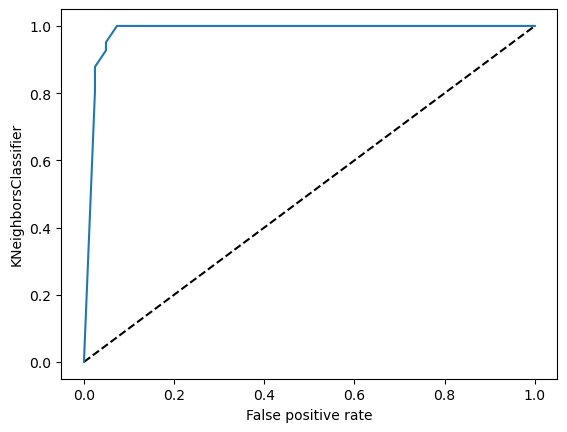

0.9390243902439024

In [117]:
y_pred_prob= knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label= 'KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('KNeighborsClassifier')
plt.show()
auc_score= roc_auc_score(y_test, knn.predict(x_test))
auc_score